# ACM : An√°lisis de Correspondencia M√∫ltiple  
## C√≥mo los h√°bitos de sue√±o y rendimiento definen perfiles estudiantiles  

---

### 1. Contexto del problema  

En este estudio se trabaja con un **conjunto de datos recolectados por estudiantes de la asignatura *Probabilidad y Estad√≠stica I***. donde a partir de una muestra de 64 estudiantes, se tomaron datos relacionados con los h√°bitos de sue√±o, rendimiento, entre otros. 


Las variables recopiladas incluyen aspectos como:  
- Horas y calidad del sue√±o  
- Factores que afectan el descanso  
- Desempe√±o acad√©mico y puntualidad  
- Fatiga, concentraci√≥n y actividades estudiantiles  
- Caracter√≠sticas acad√©micas y demogr√°ficas (semestre, g√©nero, carrera, beca, etc.)  




### Variables del dataset

| **Variable**            | **Descripci√≥n** |
|--------------------------|-----------------|
| SEMESTRE                 | Semestre acad√©mico en el que se encuentra el estudiante |
| GENERO                   | Sexo del estudiante (masculino / femenino / otro) |
| CARRERA                  | Programa acad√©mico principal que cursa el estudiante |
| DOBLECARRERA             | Indica si el estudiante cursa un doble programa (s√≠ / no) |
| HORAS                    | Cantidad promedio de horas que duerme el estudiante |
| SLEEP                    | Frecuencia de sue√±o adecuado (nunca, casi nunca, a veces, frecuentemente, siempre) |
| FACTORES                 | Razones que afectan el descanso (ej. estr√©s, trabajo, uso de pantallas, etc.) |
| CONCENTRACION            | Percepci√≥n del nivel de concentraci√≥n en clases o estudios |
| DESEMPE√ëO                | Autoevaluaci√≥n del rendimiento acad√©mico |
| PUNTUALIDAD              | Nivel de puntualidad en clases o actividades acad√©micas |
| FATIGA                   | Nivel de cansancio reportado por el estudiante |
| BECA                     | Si el estudiante cuenta con alg√∫n tipo de beca (s√≠ / no) |
| RETIRO                   | Si ha realizado retiros de materias o asignaturas |
| CREDITOS                 | N√∫mero de cr√©ditos matriculados en el semestre |
| CALIDAD                  | Percepci√≥n de la calidad de sue√±o segun contextos acad√©micos |
| ACTIVIDADES              | Participaci√≥n en actividades extracurriculares (deportivas, culturales, etc.) |


### 2. Qu√© es el MCA?

Seg√∫n un estudio en Medium de la comunidad KNIME ,el an√°lisis de correspondencias m√∫ltiple es una t√©cnica para analizar las relaciones entre variables categ√≥ricas y crear perfiles basados ‚Äã‚Äãen las proyecciones de las variables originales a las nuevas *dimensiones* que crea. Esto resulta bastante √∫til al momento de analizar y visualizar datos de encuestas.


Dado que estas dimensiones **no act√∫an de manera aislada**, sino que interact√∫an entre s√≠, es necesario emplear un **an√°lisis multivariado**.  
Este tipo de an√°lisis permite estudiar de forma conjunta las m√∫ltiples variables categ√≥ricas y descubrir **patrones de asociaci√≥n** que no ser√≠an visibles mediante un an√°lisis univariado o bivariado.  

En este caso, el **An√°lisis de Correspondencia M√∫ltiple (ACM)** se convierte en la herramienta adecuada para:  
- Reducir la complejidad de los datos.  
- Visualizar relaciones entre categor√≠as.  
- Construir perfiles estudiantiles m√°s completos y representativos.  



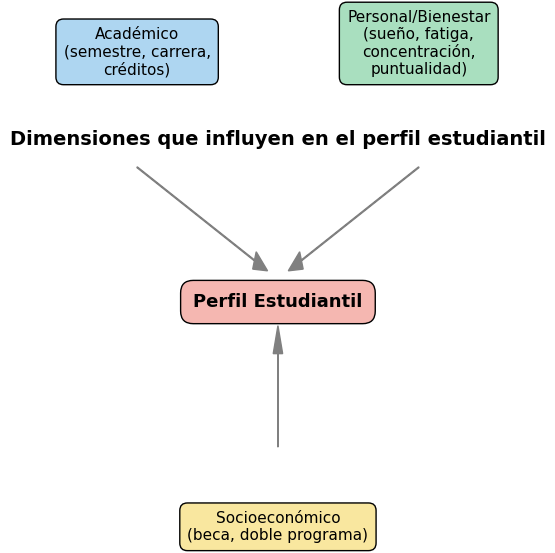

In [1]:
import matplotlib.pyplot as plt

# Crear figura
plt.figure(figsize=(4,4))

# Nodos principales
plt.text(0.2, 0.8, "Acad√©mico\n(semestre, carrera,\ncr√©ditos)", ha="center", fontsize=11,
         bbox=dict(boxstyle="round,pad=0.5", fc="#AED6F1", ec="black"))
plt.text(0.8, 0.8, "Personal/Bienestar\n(sue√±o, fatiga,\nconcentraci√≥n,\npuntualidad)", ha="center", fontsize=11,
         bbox=dict(boxstyle="round,pad=0.5", fc="#A9DFBF", ec="black"))
plt.text(0.5, 0.3, "Socioecon√≥mico\n(beca, doble programa)", ha="center", fontsize=11,
         bbox=dict(boxstyle="round,pad=0.5", fc="#F9E79F", ec="black"))

# Nodo central: perfil
plt.text(0.5, 0.55, "Perfil Estudiantil", ha="center", fontsize=13, fontweight="bold",
         bbox=dict(boxstyle="round,pad=0.7", fc="#F5B7B1", ec="black"))

# Flechas
plt.arrow(0.2, 0.7, 0.25, -0.1, head_width=0.02, color="gray")
plt.arrow(0.8, 0.7, -0.25, -0.1, head_width=0.02, color="gray")
plt.arrow(0.5, 0.4, 0, 0.1, head_width=0.02, color="gray")

plt.axis("off")
plt.title("Dimensiones que influyen en el perfil estudiantil", fontsize=14, fontweight="bold")
plt.show()

### 3. Pasos para hacer un analisis de correspondencia m√∫ltiple

#### 1. Recopilaci√≥n y organizaci√≥n de datos

El dataset est√° almacenado en un archivo `.csv`, donde:  
- Cada **fila** representa a un estudiante encuestado.  
- Cada **columna** corresponde a una variable de la encuesta.  

Las variables se agrupan en tres dimensiones principales:  

1. **Acad√©micas**: semestre, carrera, cr√©ditos matriculados, retiros.  
2. **Personales y de bienestar**: horas de sue√±o, frecuencia del sue√±o (*sleep*), fatiga, concentraci√≥n, puntualidad, calidad percibida.  
3. **Socioecon√≥micas**: beca, doble programa, participaci√≥n en actividades.  

#### 2. Definici√≥n de Variables Activas vs Suplementarias en MCA

En el An√°lisis de Correspondencia M√∫ltiple, es fundamental distinguir entre dos tipos de variables:

##### **Variables Activas**
Son las variables que **participan directamente** en la construcci√≥n de los ejes factoriales del MCA. Estas variables:
- Determinan la estructura de las dimensiones principales
- Contribuyen al c√°lculo de las coordenadas factoriales
- Son las que queremos analizar en profundidad para encontrar patrones

**Para nuestro estudio, las variables activas ser√°n:**
- `SLEEP`: Frecuencia de sue√±o adecuado
- `CONCENTRACION`: Nivel de concentraci√≥n en estudios
- `DESEMPENO`: Autoevaluaci√≥n del rendimiento acad√©mico
- `PUNTUALIDAD`: Nivel de puntualidad
- `FATIGA`: Nivel de cansancio reportado
- `CALIDAD`: Percepci√≥n de la calidad de sue√±o

**¬øPor qu√© estas variables son activas?**
Porque representan los **h√°bitos de sue√±o y rendimiento** que queremos analizar como fen√≥meno principal. Son las dimensiones centrales de nuestro estudio.

##### **Variables Suplementarias**
Son variables que **no participan** en la construcci√≥n de los ejes, pero se proyectan sobre ellos para:
- Ayudar en la interpretaci√≥n de los resultados
- Caracterizar los perfiles encontrados
- Validar los patrones identificados

**Para nuestro estudio, las variables suplementarias ser√°n:**
- `GENERO`: Para ver diferencias por sexo
- `CARRERA`: Para identificar patrones por programa acad√©mico
- `SEMESTRE`: Para analizar diferencias por nivel acad√©mico
- `BECA`: Para evaluar el factor socioecon√≥mico

**¬øPor qu√© estas variables son suplementarias?**
Porque son **caracter√≠sticas de contexto** que nos ayudan a interpretar y caracterizar los perfiles, pero no son el objeto principal de an√°lisis.


In [12]:
# CARGA Y EXPLORACI√ìN INICIAL DE DATOS
import pandas as pd

# Cargar el dataset de h√°bitos estudiantiles
df = pd.read_csv("habitos_estudiantes.csv", sep=";")

print("Dimensiones del dataset:", df.shape)
print("\nVisualizaci√≥n completa del dataset:")

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
display(df)

Dimensiones del dataset: (64, 16)

Visualizaci√≥n completa del dataset:


SEMESTRE     GENERO                                            CARRERA  \
0          2   Femenino         Administration de negocios internacionales   
1          4   Femenino  Administraci√≥n de mercadeo y log√≠stica interna...   
2          4  Masculino  Administraci√≥n de mercadeo y log√≠stica interna...   
3          4   Femenino  Administraci√≥n de mercadeo y log√≠stica interna...   
4          5   Femenino                                 Ingenier√≠a Qu√≠mica   
5          3   Femenino                              Ingenier√≠a Industrial   
6          5  Masculino                                Ingenier√≠a Mec√°nica   
7          2  Masculino                Economia y finanzas internacionales   
8          3  Masculino                                Ingenier√≠a Mec√°nica   
9          2   Femenino                                           Medicina   
10         4  Masculino                        Ingenieria de Bioproducci√≥n   
11         4   Femenino                        Ingenieria de Bioproducci√≥n   
12         8   Femenino                        Ingenieria de Bioproducci√≥n   
13         3  Masculino                                            Derecho   
14         3  Masculino                                   Ingenieria Civil   
15         3  Masculino                                 Ciencias politicas   
16         8  Masculino                   Comunicaci√≥n social y periodismo   
17         3   Femenino                              Ingenier√≠a Industrial   
18         5   Femenino         Administration de negocios internacionales   
19         6  Masculino                                 Ingenier√≠a Qu√≠mica   
20         7  Masculino                           Comunicaci√≥n corporativa   
21         6   Femenino                             Ingenieria inform√°tica   
22         7  Masculino                         Administraci√≥n de empresas   
23         8   Femenino                                 Ingenier√≠a Qu√≠mica   
24         6   Femenino                          Administraci√≥n y servicio   
25         8   Femenino                                 Ingenier√≠a Qu√≠mica   
26         6   Femenino                                 Ingenier√≠a Qu√≠mica   
27         6   Femenino                                 Ingenier√≠a Qu√≠mica   
28         2  Masculino                Economia y finanzas internacionales   
29         6  Masculino                                 Ingenier√≠a Qu√≠mica   
30         7  Masculino             Comunicaci√≥n audiovisual y multimedios   
31         6  Masculino                                 Ingenier√≠a Qu√≠mica   
32         2  Masculino                                Ingenier√≠a Mec√°nica   
33         2  Masculino                         Administraci√≥n de empresas   
34         1  Masculino                                        Gastronomia   
35         2   Femenino         Administration de negocios internacionales   
36         2   Femenino         Administration de negocios internacionales   
37         2   Femenino                                   Ingenieria Civil   
38         4  Masculino                                   Ingenieria Civil   
39         3  Masculino                                            Derecho   
40         5   Femenino                                 Ingenier√≠a Qu√≠mica   
41         5   Femenino                                 Ingenier√≠a Qu√≠mica   
42         5   Femenino                                 Ingenier√≠a Qu√≠mica   
43         5   Femenino                                 Ingenier√≠a Qu√≠mica   
44         5   Femenino                                 Ingenier√≠a Qu√≠mica   
45         3  Masculino                                   Ingenieria Civil   
46         3  Masculino                                   Ingenieria Civil   
47         3   Femenino                                   Ingenieria Civil   
48         4   Femenino                         Administraci√≥n de empresas   
49         4   Femenino         Administration de neg

#### 2. Preprocesamiento de los datos

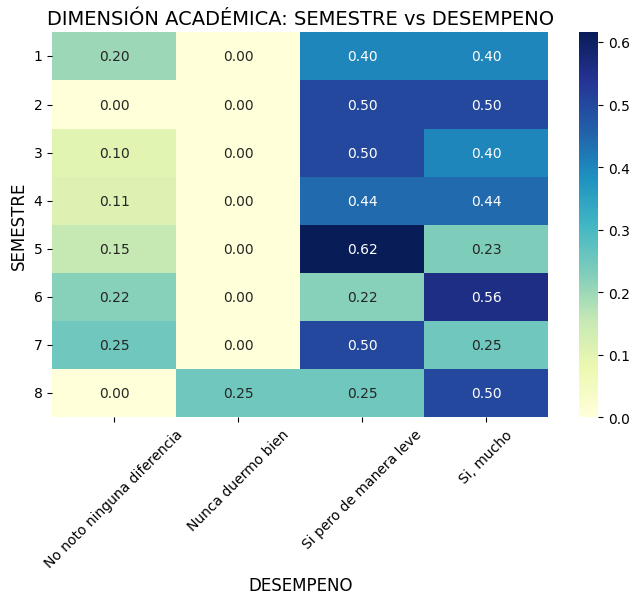

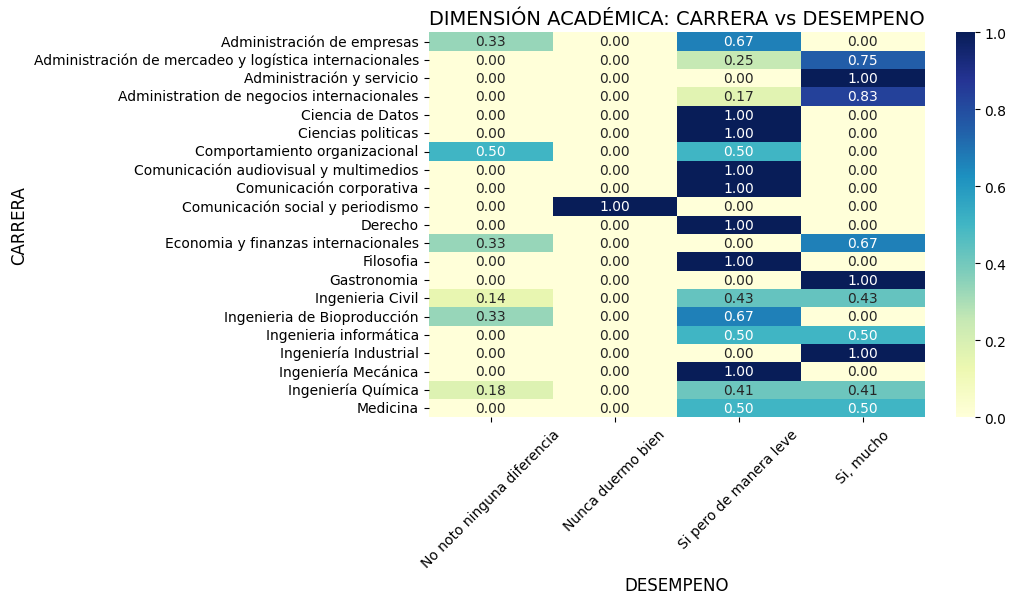

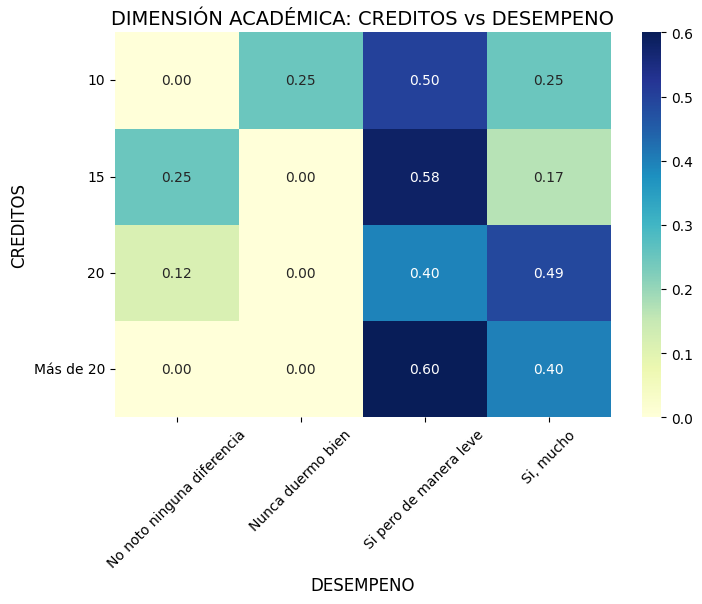

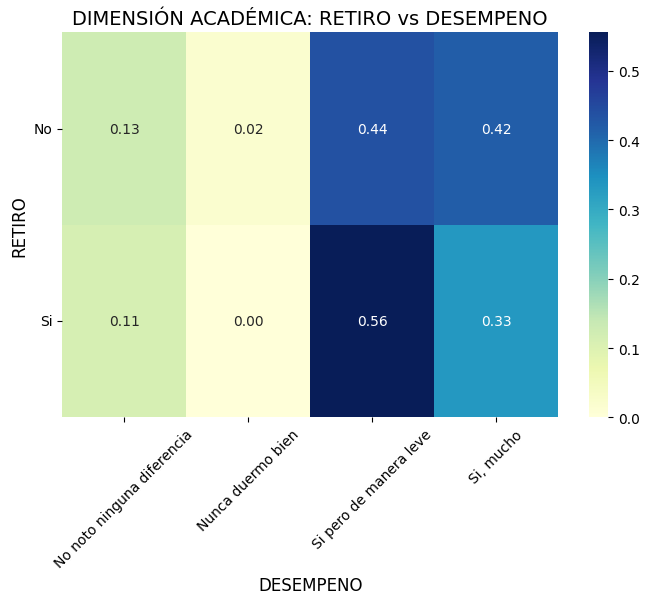

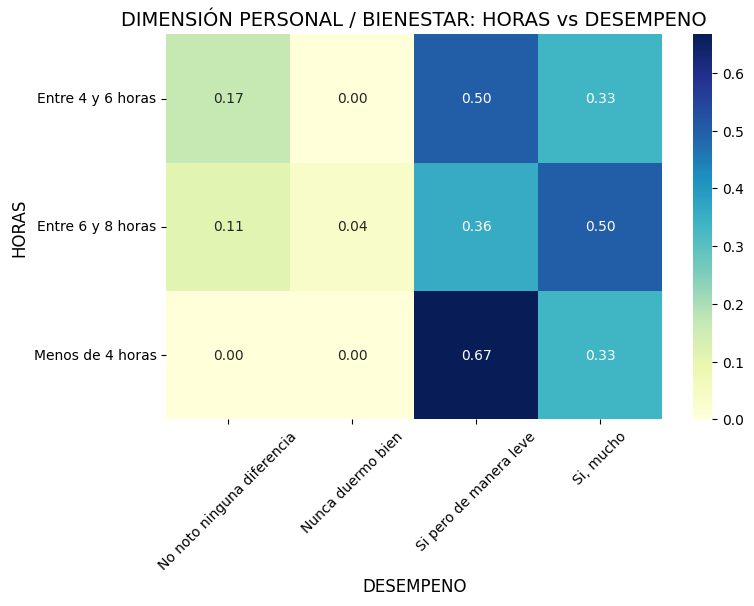

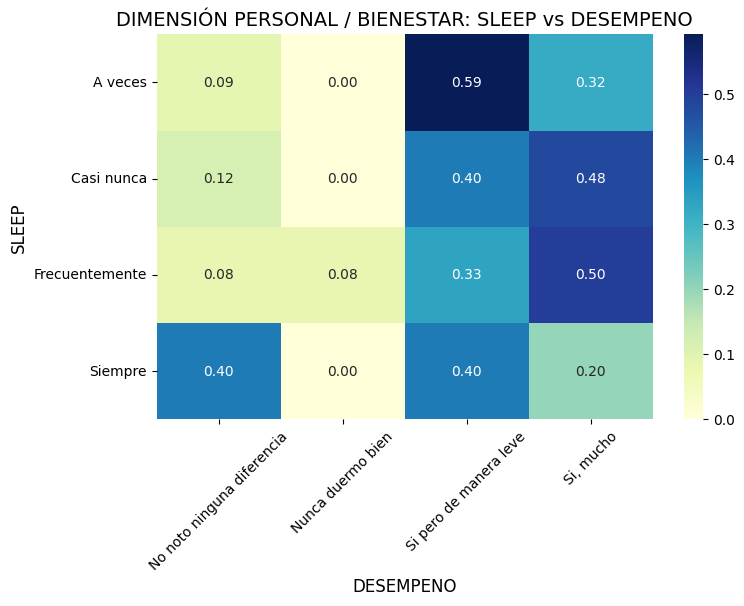

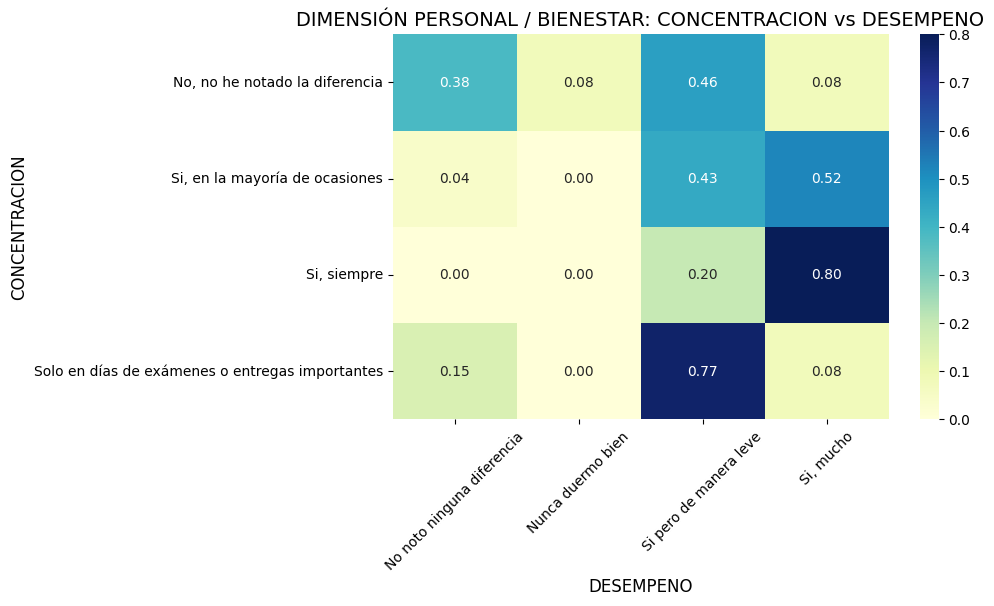

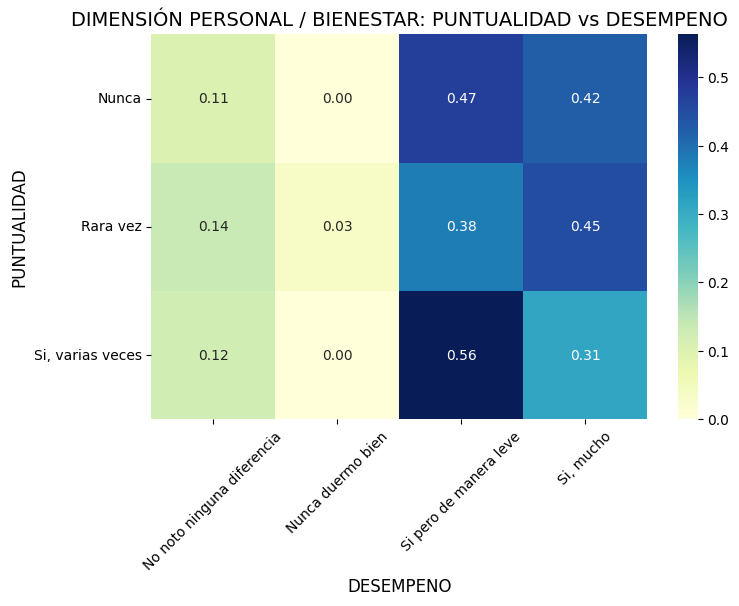

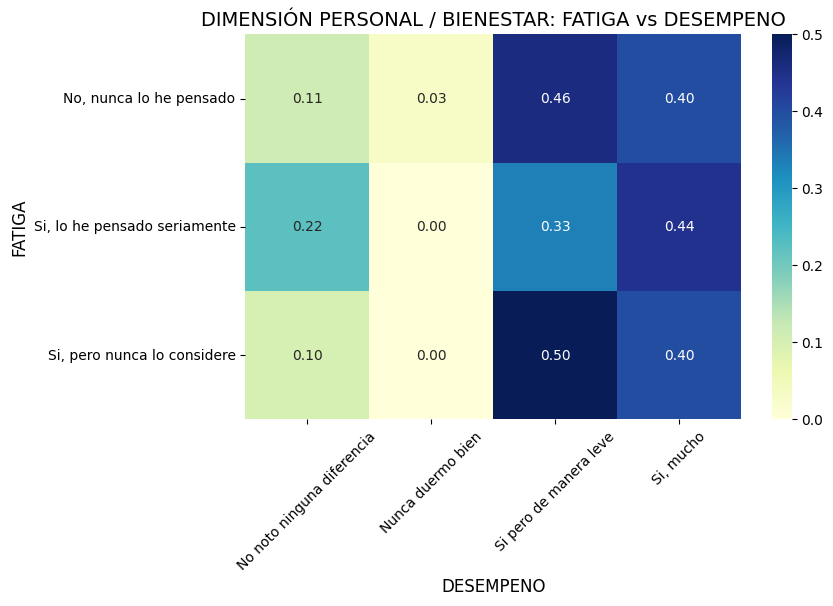

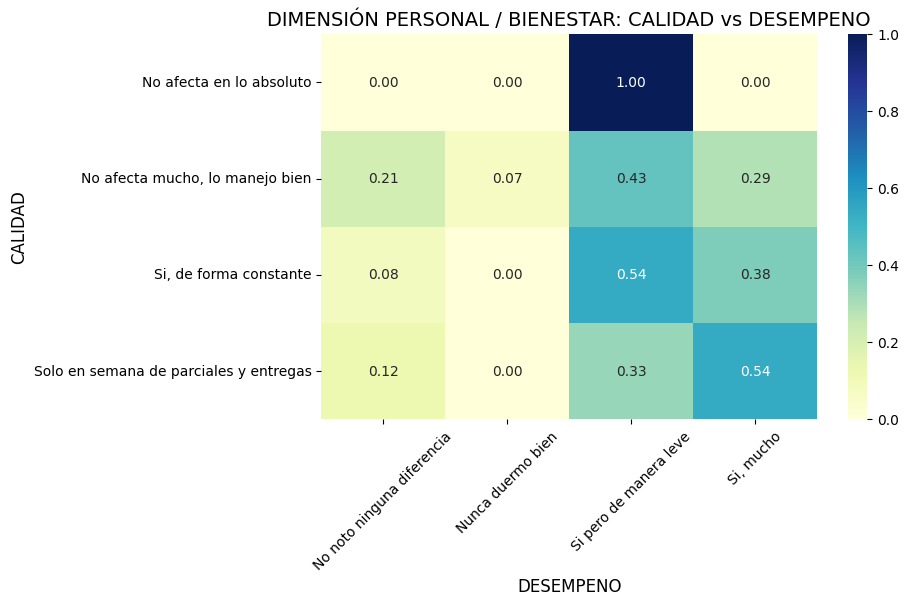

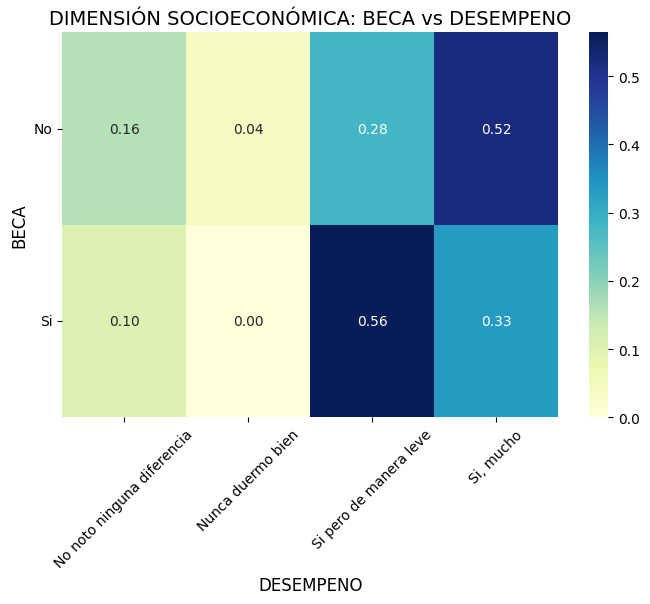

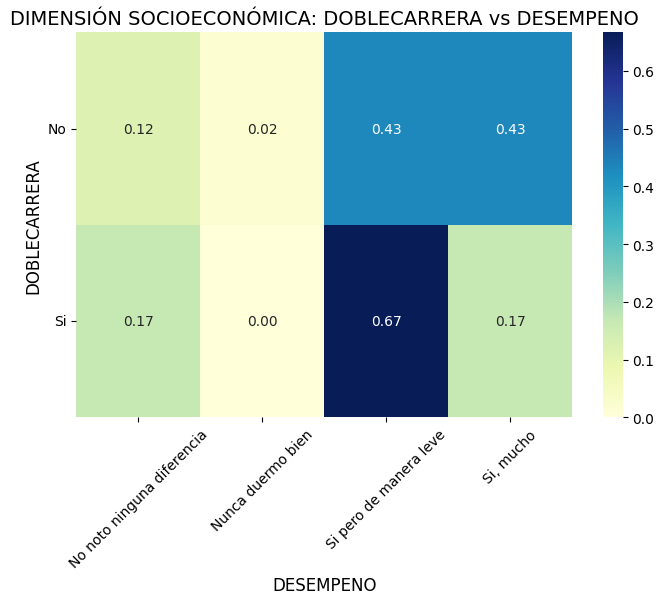

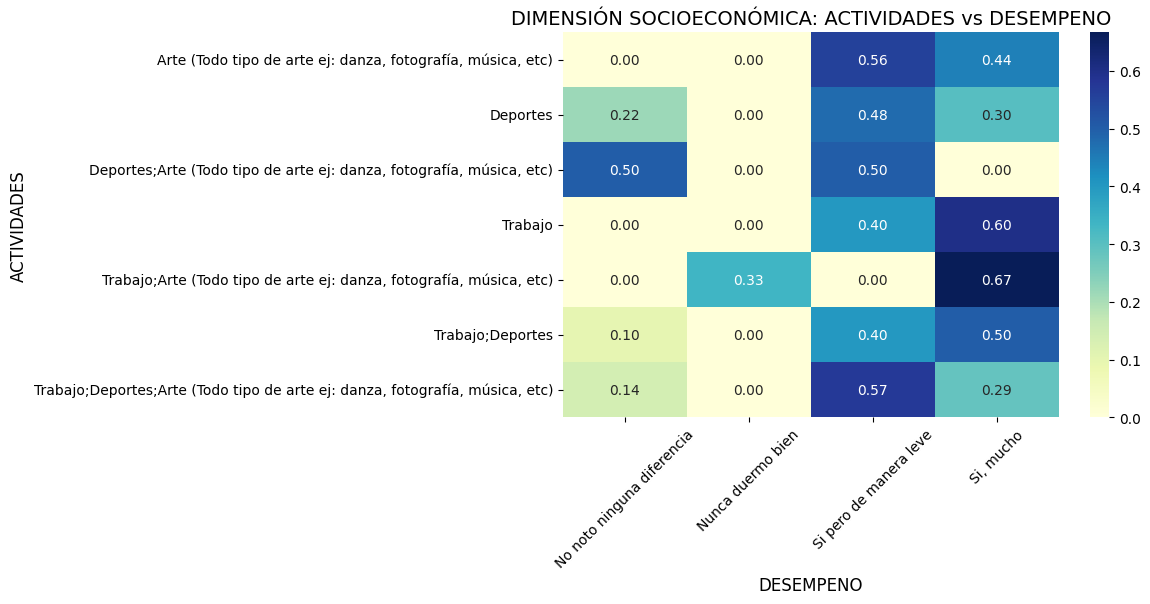

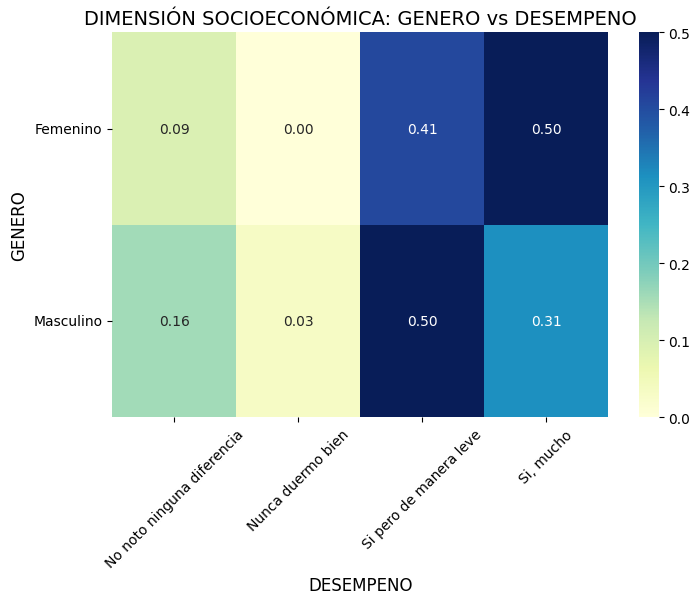

In [7]:
# AN√ÅLISIS EXPLORATORIO: RELACIONES ENTRE VARIABLES
import matplotlib.pyplot as plt
import seaborn as sns

# Definir variables activas (las que participar√°n en el MCA)
VARIABLES_ACTIVAS = ['SLEEP', 'CONCENTRACION', 'DESEMPENO', 'PUNTUALIDAD', 'FATIGA', 'CALIDAD']

# Definir variables suplementarias (para interpretaci√≥n)
VARIABLES_SUPLEMENTARIAS = ['GENERO', 'CARRERA', 'SEMESTRE', 'BECA']

# Re-definir las variables por dimensi√≥n con nombres en may√∫sculas
ACADEMICAS = ['SEMESTRE', 'CARRERA', 'CREDITOS', 'RETIRO']
PERSONALES = ['HORAS', 'SLEEP', 'CONCENTRACION', 'PUNTUALIDAD', 'FATIGA', 'CALIDAD']
SOCIOECO   = ['BECA', 'DOBLECARRERA', 'ACTIVIDADES', 'GENERO']

# Funci√≥n para graficar heatmaps de contingencia
def plot_heatmaps(vars_list, target="DESEMPENO", title=""):
    for col in vars_list:
        tabla = pd.crosstab(df[col], df[target], normalize="index")
        plt.figure(figsize=(8,5))
        sns.heatmap(tabla, annot=True, fmt=".2f", cmap="YlGnBu")
        plt.title(f"{title}: {col} vs {target}", fontsize=14)
        plt.ylabel(col, fontsize=12)
        plt.xlabel(target, fontsize=12)
        plt.xticks(rotation=45)
        plt.yticks(rotation=0)
        plt.show()

# Acad√©micas
plot_heatmaps(ACADEMICAS, target="DESEMPENO", title="DIMENSI√ìN ACAD√âMICA")

# Personales / Bienestar
plot_heatmaps(PERSONALES, target="DESEMPENO", title="DIMENSI√ìN PERSONAL / BIENESTAR")

# Socioecon√≥micas
plot_heatmaps(SOCIOECO, target="DESEMPENO", title="DIMENSI√ìN SOCIOECON√ìMICA")

In [23]:
# LIMPIEZA Y ESTANDARIZACI√ìN DE DATOS
import pandas as pd

# Crear una copia del dataframe para el preprocesamiento
df_mca = df.copy()

# Seleccionar solo las variables activas para el MCA
data_activas = df_mca[VARIABLES_ACTIVAS].copy()

print("=== EXPLORACI√ìN DE DATOS FALTANTES ===")

# Verificar valores faltantes para cada variable
datos_faltantes_encontrados = False

for var in VARIABLES_ACTIVAS:
    faltantes = data_activas[var].isnull().sum()
    if faltantes > 0:
        print(f"‚ùå {var}: {faltantes} datos faltantes encontrados")
        # Reemplazar valores faltantes por 'FALTANTE'
        data_activas[var] = data_activas[var].fillna('FALTANTE')
        print(f"‚úì {var}: Reemplazados {faltantes} valores faltantes por 'FALTANTE'")
        datos_faltantes_encontrados = True
    else:
        print(f"‚úì {var}: Sin datos faltantes")

if not datos_faltantes_encontrados:
    print("üéâ No se encontraron datos faltantes en ninguna variable activa")

print("\n=== ESTANDARIZACI√ìN DE VARIABLES QUE REQUIEREN LIMPIEZA ===")

# CONCENTRACION: Requiere estandarizaci√≥n (simplificar respuestas largas)
print("\nüîß Estandarizando CONCENTRACION...")
antes = data_activas['CONCENTRACION'].unique()
data_activas['CONCENTRACION'] = data_activas['CONCENTRACION'].replace({
    'Si, siempre': 'Siempre',
    'Si, en la mayor√≠a de ocasiones': 'Mayor√≠a ocasiones', 
    'Solo en d√≠as de ex√°menes o entregas importantes': 'Solo ex√°menes',
    'No, no he notado la diferencia': 'No nota diferencia'
})
despues = data_activas['CONCENTRACION'].unique()
print(f"‚úì CONCENTRACION estandarizada exitosamente")
print(f"  Antes: {len(antes)} categor√≠as ‚Üí Despu√©s: {len(despues)} categor√≠as")

# DESEMPENO: Requiere estandarizaci√≥n (simplificar respuestas)
print("\nüîß Estandarizando DESEMPENO...")
antes = data_activas['DESEMPENO'].unique()
data_activas['DESEMPENO'] = data_activas['DESEMPENO'].replace({
    'Si, mucho': 'Mucho',
    'Si pero de manera leve': 'Leve',
    'No noto ninguna diferencia': 'No',
    'Nunca duermo bien': 'No'

})
despues = data_activas['DESEMPENO'].unique()
print(f"‚úì DESEMPENO estandarizada exitosamente")
print(f"  Antes: {len(antes)} categor√≠as ‚Üí Despu√©s: {len(despues)} categor√≠as")

# FATIGA: Requiere estandarizaci√≥n (simplificar respuestas largas)
print("\nüîß Estandarizando FATIGA...")
antes = data_activas['FATIGA'].unique()
data_activas['FATIGA'] = data_activas['FATIGA'].replace({
    'No, nunca lo he pensado': 'Nunca',
    'Si, pero nunca lo considere': 'Poco considerado',
    'Si, lo he pensado seriamente': 'Pensado seriamente'
})
despues = data_activas['FATIGA'].unique()
print(f"‚úì FATIGA estandarizada exitosamente")
print(f"  Antes: {len(antes)} categor√≠as ‚Üí Despu√©s: {len(despues)} categor√≠as")

# CALIDAD: Requiere estandarizaci√≥n (simplificar respuestas largas)
print("\nüîß Estandarizando CALIDAD...")
antes = data_activas['CALIDAD'].unique()
data_activas['CALIDAD'] = data_activas['CALIDAD'].replace({
    'Si, de forma constante': 'Constante',
    'Solo en semana de parciales y entregas': 'Solo parciales',
    'No afecta mucho, lo manejo bien': 'Manejo bien',
    'No afecta en lo absoluto': 'No afecta'
})
despues = data_activas['CALIDAD'].unique()
print(f"‚úì CALIDAD estandarizada exitosamente")
print(f"  Antes: {len(antes)} categor√≠as ‚Üí Despu√©s: {len(despues)} categor√≠as")

# Variables que NO requieren estandarizaci√≥n
print(f"\nüìã Variables SIN cambios (ya est√°n estandarizadas):")
print(f"‚úì SLEEP: Categor√≠as ya claras y consistentes")
print(f"‚úì PUNTUALIDAD: Categor√≠as ya claras y consistentes")

print(f"\n=== DATASET FINAL LIMPIO ===")
print(f"üìä Dimensiones: {data_activas.shape[0]} observaciones x {data_activas.shape[1]} variables")
print(f"üìù Variables activas procesadas: {list(data_activas.columns)}")

# Verificaci√≥n final
print(f"\nüîç Verificaci√≥n final - Valores √∫nicos por variable:")
for col in VARIABLES_ACTIVAS:
    print(f"  {col}: {data_activas[col].nunique()} categor√≠as √∫nicas")

# Guardar datos limpios
data_clean_step1 = data_activas.copy()
print(f"\n‚úÖ Datos limpios guardados en 'data_clean_step1' para siguiente paso")
display(data_clean_step1)

=== EXPLORACI√ìN DE DATOS FALTANTES ===
‚úì SLEEP: Sin datos faltantes
‚úì CONCENTRACION: Sin datos faltantes
‚úì DESEMPENO: Sin datos faltantes
‚úì PUNTUALIDAD: Sin datos faltantes
‚úì FATIGA: Sin datos faltantes
‚úì CALIDAD: Sin datos faltantes
üéâ No se encontraron datos faltantes en ninguna variable activa

=== ESTANDARIZACI√ìN DE VARIABLES QUE REQUIEREN LIMPIEZA ===

üîß Estandarizando CONCENTRACION...
‚úì CONCENTRACION estandarizada exitosamente
  Antes: 4 categor√≠as ‚Üí Despu√©s: 4 categor√≠as

üîß Estandarizando DESEMPENO...
‚úì DESEMPENO estandarizada exitosamente
  Antes: 4 categor√≠as ‚Üí Despu√©s: 3 categor√≠as

üîß Estandarizando FATIGA...
‚úì FATIGA estandarizada exitosamente
  Antes: 3 categor√≠as ‚Üí Despu√©s: 3 categor√≠as

üîß Estandarizando CALIDAD...
‚úì CALIDAD estandarizada exitosamente
  Antes: 4 categor√≠as ‚Üí Despu√©s: 4 categor√≠as

üìã Variables SIN cambios (ya est√°n estandarizadas):
‚úì SLEEP: Categor√≠as ya claras y consistentes
‚úì PUNTUALIDAD: Ca

SLEEP       CONCENTRACION DESEMPENO       PUNTUALIDAD  \
0   Frecuentemente   Mayor√≠a ocasiones     Mucho          Rara vez   
1       Casi nunca       Solo ex√°menes     Mucho  Si, varias veces   
2          A veces             Siempre     Mucho             Nunca   
3          A veces   Mayor√≠a ocasiones     Mucho             Nunca   
4       Casi nunca       Solo ex√°menes      Leve  Si, varias veces   
5          A veces   Mayor√≠a ocasiones     Mucho          Rara vez   
6       Casi nunca  No nota diferencia      Leve  Si, varias veces   
7       Casi nunca  No nota diferencia     Mucho             Nunca   
8   Frecuentemente   Mayor√≠a ocasiones      Leve  Si, varias veces   
9   Frecuentemente   Mayor√≠a ocasiones     Mucho          Rara vez   
10         A veces       Solo ex√°menes      Leve             Nunca   
11  Frecuentemente       Solo ex√°menes        No             Nunca   
12      Casi nunca       Solo ex√°menes      Leve             Nunca   
13         A veces       Solo ex√°menes      Leve          Rara vez   
14      Casi nunca  No nota diferencia        No  Si, varias veces   
15  Frecuentemente       Solo ex√°menes      Leve  Si, varias veces   
16  Frecuentemente  No nota diferencia        No          Rara vez   
17      Casi nunca             Siempre     Mucho          Rara vez   
18      Casi nunca             Siempre     Mucho  Si, varias veces   
19  Frecuentemente             Siempre     Mucho  Si, varias veces   
20         A veces   Mayor√≠a ocasiones      Leve             Nunca   
21      Casi nunca             Siempre     Mucho          Rara vez   
22         A veces  No nota diferencia        No          Rara vez   
23      Casi nunca   Mayor√≠a ocasiones     Mucho          Rara vez   
24      Casi nunca   Mayor√≠a ocasiones     Mucho             Nunca   
25  Frecuentemente             Siempre     Mucho             Nunca   
26         A veces   Mayor√≠a ocasiones        No          Rara vez   
27      Casi nunca   Mayor√≠a ocasiones      Leve             Nunca   
28  Frecuentemente             Siempre     Mucho             Nunca   
29         Siempre       Solo ex√°menes        No          Rara vez   
30         A veces  No nota diferencia      Leve          Rara vez   
31         Siempre             Siempre     Mucho          Rara vez   
32  Frecuentemente             Siempre      Leve          Rara vez   
33      Casi nunca   Mayor√≠a ocasiones      Leve          Rara vez   
34      Casi nunca   Mayor√≠a ocasiones     Mucho          Rara vez   
35      Casi nunca             Siempre      Leve             Nunca   
36         A veces             Siempre     Mucho  Si, varias veces   
37         A veces   Mayor√≠a ocasiones      Leve  Si, varias veces   
38      Casi nunca  No nota diferencia      Leve          Rara vez   
39         Siempre       Solo ex√°menes      Leve  Si, varias veces   
40         Siempre       Solo ex√°menes      Leve          Rara vez   
41         A veces   Mayor√≠a ocasiones      Leve          Rara vez   
42         A veces   Mayor√≠a ocasiones      Leve          Rara vez   
43      Casi nunca  No nota diferencia        No  Si, varias veces   
44      Casi nunca  No nota diferencia      Leve  Si, varias veces   
45         A veces  No nota diferencia      Leve             Nunca   
46      Casi nunca             Siempre     Mucho          Rara vez   
47  Frecuentemente   Mayor√≠a ocasiones     Mucho             Nunca   
48  Frecuentemente   Mayor√≠a ocasiones      Leve  Si, varias veces   
49      Casi nunca   Mayor√≠a ocasiones     Mucho          Rara vez   
50      Casi nunca  No nota diferencia        No             Nunca   
51         A veces   Mayor√≠a ocasiones      Leve  Si, varias veces   
52      Casi nunca   Mayor√≠a ocasiones     Mucho          Rara vez   
53         A veces  No nota diferencia      Leve             Nunca   
54         A veces             Siempre     Mucho          Rara vez   
55         A veces   Mayor√≠a ocasiones     Mucho  Si, varias v

In [24]:
# ENCODING DE VARIABLES CATEG√ìRICAS
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Trabajar con los datos limpios del paso anterior
data_activas = data_clean_step1.copy()

print("=== AN√ÅLISIS DEL TIPO DE VARIABLES PARA ENCODING ===")

# Clasificaci√≥n de variables seg√∫n su naturaleza
print("\n--- VARIABLES ORDINALES (LabelEncoder) ---")
print("SLEEP: Orden natural de frecuencia")
print("CONCENTRACION: Orden de intensidad")  
print("DESEMPENO: Orden de rendimiento")
print("PUNTUALIDAD: Orden de frecuencia")
print("FATIGA: Orden de nivel de consideraci√≥n")

print("\n--- VARIABLES NOMINALES (OneHotEncoder) ---")
print("CALIDAD: Diferentes contextos sin orden inherente")

print(f"\n=== APLICANDO ENCODING ===")

# Crear DataFrame para datos encodificados
data_encoded = data_activas.copy()

# APLICAR LABEL ENCODING PARA VARIABLES ORDINALES
ordinal_vars = ['SLEEP', 'CONCENTRACION', 'DESEMPENO', 'PUNTUALIDAD', 'FATIGA']

for var in ordinal_vars:
    print(f"\nAplicando LabelEncoder a {var}...")
    
    # Definir orden manual para cada variable ordinal
    if var == 'SLEEP':
        order = ['Nunca', 'Casi nunca', 'A veces', 'Frecuentemente', 'Siempre']
    elif var == 'CONCENTRACION':
        order = ['No nota diferencia', 'Solo ex√°menes', 'Mayor√≠a ocasiones', 'Siempre']
    elif var == 'DESEMPENO':
        order = ['No', 'Leve', 'Mucho']
    elif var == 'PUNTUALIDAD':
        order = ['Nunca', 'Rara vez', 'Si, varias veces', 'Siempre']
    elif var == 'FATIGA':
        order = ['Nunca', 'Poco considerado', 'Pensado seriamente']
    
    # Crear mapeo ordenado
    order_mapping = {category: i for i, category in enumerate(order)}
    data_encoded[var] = data_activas[var].map(order_mapping)
    
    print(f"‚úì Mapeo aplicado: {order_mapping}")

# APLICAR ONE-HOT ENCODING PARA CALIDAD
print(f"\nAplicando OneHotEncoder a CALIDAD...")
dummies = pd.get_dummies(data_activas['CALIDAD'], prefix='CALIDAD')
data_encoded = data_encoded.drop(columns=['CALIDAD'])
data_encoded = pd.concat([data_encoded, dummies], axis=1)
print(f"‚úì Variables creadas: {list(dummies.columns)}")

print(f"\n=== RESULTADO FINAL DEL ENCODING ===")
print(f"Dimensiones finales: {data_encoded.shape}")
print(f"Variables finales: {list(data_encoded.columns)}")

# Verificar que no hay valores faltantes tras el encoding
print(f"\nValores faltantes tras encoding: {data_encoded.isnull().sum().sum()}")

# Guardar para siguiente paso
data_for_mca = data_encoded.copy()
print(f"\n‚úÖ Datos encodificados guardados en 'data_for_mca' para el MCA")
display(data_for_mca)

=== AN√ÅLISIS DEL TIPO DE VARIABLES PARA ENCODING ===

--- VARIABLES ORDINALES (LabelEncoder) ---
SLEEP: Orden natural de frecuencia
CONCENTRACION: Orden de intensidad
DESEMPENO: Orden de rendimiento
PUNTUALIDAD: Orden de frecuencia
FATIGA: Orden de nivel de consideraci√≥n

--- VARIABLES NOMINALES (OneHotEncoder) ---
CALIDAD: Diferentes contextos sin orden inherente

=== APLICANDO ENCODING ===

Aplicando LabelEncoder a SLEEP...
‚úì Mapeo aplicado: {'Nunca': 0, 'Casi nunca': 1, 'A veces': 2, 'Frecuentemente': 3, 'Siempre': 4}

Aplicando LabelEncoder a CONCENTRACION...
‚úì Mapeo aplicado: {'No nota diferencia': 0, 'Solo ex√°menes': 1, 'Mayor√≠a ocasiones': 2, 'Siempre': 3}

Aplicando LabelEncoder a DESEMPENO...
‚úì Mapeo aplicado: {'No': 0, 'Leve': 1, 'Mucho': 2}

Aplicando LabelEncoder a PUNTUALIDAD...
‚úì Mapeo aplicado: {'Nunca': 0, 'Rara vez': 1, 'Si, varias veces': 2, 'Siempre': 3}

Aplicando LabelEncoder a FATIGA...
‚úì Mapeo aplicado: {'Nunca': 0, 'Poco considerado': 1, 'Pensado s

SLEEP  CONCENTRACION  DESEMPENO  PUNTUALIDAD  FATIGA  CALIDAD_Constante  \
0       3              2          2            1       1               True   
1       1              1          2            2       2              False   
2       2              3          2            0       0               True   
3       2              2          2            0       0              False   
4       1              1          1            2       0              False   
5       2              2          2            1       0              False   
6       1              0          1            2       2              False   
7       1              0          2            0       0              False   
8       3              2          1            2       1               True   
9       3              2          2            1       0              False   
10      2              1          1            0       0               True   
11      3              1          0            0       0              False   
12      1              1          1            0       0              False   
13      2              1          1            1       1              False   
14      1              0          0            2       2              False   
15      3              1          1            2       2               True   
16      3              0          0            1       0              False   
17      1              3          2            1       1               True   
18      1              3          2            2       0              False   
19      3              3          2            2       2               True   
20      2              2          1            0       0              False   
21      1              3          2            1       0              False   
22      2              0          0            1       1              False   
23      1              2          2            1       1              False   
24      1              2          2            0       1              False   
25      3              3          2            0       1               True   
26      2              2          0            1       1              False   
27      1              2          1            0       0              False   
28      3              3          2            0       0               True   
29      4              1          0            1       0               True   
30      2              0          1            1       2              False   
31      4              3          2            1       0              False   
32      3              3          1            1       1               True   
33      1              2          1            1       0              False   
34      1              2          2            1       0              False   
35      1              3          1            0       0               True   
36      2              3          2            2       2              False   
37      2              2          1            2       1               True   
38      1              0          1            1       0               True   
39      4              1          1            2       1              False   
40      4              1          1            1       0              False   
41      2              2          1            1       0              False   
42      2              2          1            1       1               True   
43      1              0          0            2       2               True   
44      1              0          1            2       1               True   
45      2              0          1            0       1              False   
46      1              3          2            1       0               True   
47      3              2          2            0       1               True   
48      3              2          1            2       0               True   
49      1              2          2            1      

In [27]:
# IMPLEMENTACI√ìN DEL MCA - CONFIGURACI√ìN EST√ÅNDAR
from prince import MCA
import numpy as np

print("=== EJECUTANDO AN√ÅLISIS DE CORRESPONDENCIA M√öLTIPLE ===")

# Usar datos encodificados del paso anterior
data_clean = data_for_mca.dropna()
print(f"üìä Datos para MCA: {data_clean.shape[0]} observaciones x {data_clean.shape[1]} variables")
print(f"üìù Variables incluidas: {list(data_clean.columns)}")

# Configuraci√≥n est√°ndar del MCA
print("\nüîß CONFIGURACI√ìN DEL MCA:")
print("  ‚Ä¢ N√∫mero de componentes: 5")
print("  ‚Ä¢ Iteraciones: 3")  
print("  ‚Ä¢ Motor de c√°lculo: sklearn")
print("  ‚Ä¢ Semilla aleatoria: 42 (para reproducibilidad)")

# Crear y configurar el modelo MCA
mca = MCA(
    n_components=5,  # Configuraci√≥n est√°ndar
    n_iter=3,       # Configuraci√≥n est√°ndar
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)

# Ajustar el modelo
print("\n‚öôÔ∏è Ejecutando MCA...")
mca_result = mca.fit(data_clean)
print("‚úÖ MCA ejecutado exitosamente")

# An√°lisis de varianza explicada
print("\n=== AN√ÅLISIS DE VARIANZA EXPLICADA ===")
eigenvalues = mca_result.eigenvalues_

# Verificar qu√© atributos est√°n disponibles para explained variance
try:
    explained_variance = mca_result.explained_inertia_
    print("üìà Usando explained_inertia_")
except AttributeError:
    try:
        explained_variance = mca_result.explained_variance_ratio_
        print("üìà Usando explained_variance_ratio_")
    except AttributeError:
        # Calcular manualmente la varianza explicada
        total_inertia = np.sum(eigenvalues)
        explained_variance = eigenvalues / total_inertia
        print("üìà Calculando varianza explicada manualmente")

print("üìà Detalle por componente:")
for i, (eigenval, var_exp) in enumerate(zip(eigenvalues, explained_variance)):
    significance = "üî•" if eigenval > 0.2 else "‚ö°" if eigenval > 0.1 else "üìä"
    print(f"  Componente {i+1}: Eigenvalue = {eigenval:.4f} | Varianza = {var_exp:.2%} {significance}")

# Varianza acumulada
cumulative_2 = sum(explained_variance[:2])
cumulative_3 = sum(explained_variance[:3])
cumulative_4 = sum(explained_variance[:4])

print(f"\nüìä VARIANZA ACUMULADA:")
print(f"  Primeros 2 componentes: {cumulative_2:.2%}")
print(f"  Primeros 3 componentes: {cumulative_3:.2%}")
print(f"  Primeros 4 componentes: {cumulative_4:.2%}")

# Criterio de retenci√≥n
print(f"\nüí° CRITERIO DE RETENCI√ìN:")
if cumulative_2 >= 0.60:
    recommended = 2
    print(f"‚úÖ Recomendado: 2 componentes (explican {cumulative_2:.1%} de varianza)")
elif cumulative_3 >= 0.70:
    recommended = 3  
    print(f"‚úÖ Recomendado: 3 componentes (explican {cumulative_3:.1%} de varianza)")
else:
    recommended = 4
    print(f"‚ö†Ô∏è Recomendado: 4+ componentes (solo {cumulative_3:.1%} con 3 componentes)")

print(f"\nüéØ RESULTADO: MCA completado. Usaremos principalmente los primeros {recommended} componentes para an√°lisis.")

=== EJECUTANDO AN√ÅLISIS DE CORRESPONDENCIA M√öLTIPLE ===
üìä Datos para MCA: 64 observaciones x 9 variables
üìù Variables incluidas: ['SLEEP', 'CONCENTRACION', 'DESEMPENO', 'PUNTUALIDAD', 'FATIGA', 'CALIDAD_Constante', 'CALIDAD_Manejo bien', 'CALIDAD_No afecta', 'CALIDAD_Solo parciales']

üîß CONFIGURACI√ìN DEL MCA:
  ‚Ä¢ N√∫mero de componentes: 5
  ‚Ä¢ Iteraciones: 3
  ‚Ä¢ Motor de c√°lculo: sklearn
  ‚Ä¢ Semilla aleatoria: 42 (para reproducibilidad)

‚öôÔ∏è Ejecutando MCA...
‚úÖ MCA ejecutado exitosamente

=== AN√ÅLISIS DE VARIANZA EXPLICADA ===
üìà Calculando varianza explicada manualmente
üìà Detalle por componente:
  Componente 1: Eigenvalue = 0.2523 | Varianza = 25.35% üî•
  Componente 2: Eigenvalue = 0.2443 | Varianza = 24.56% üî•
  Componente 3: Eigenvalue = 0.1813 | Varianza = 18.22% ‚ö°
  Componente 4: Eigenvalue = 0.1721 | Varianza = 17.29% ‚ö°
  Componente 5: Eigenvalue = 0.1451 | Varianza = 14.58% ‚ö°

üìä VARIANZA ACUMULADA:
  Primeros 2 componentes: 49.91%
  Pri

=== VISUALIZACI√ìN 3D DE INDIVIDUOS ===
üìä Proyectando 5 estudiantes en espacio 3D
üéØ Dimensiones: 1 (25.4%), 2 (24.6%), 3 (18.2%)


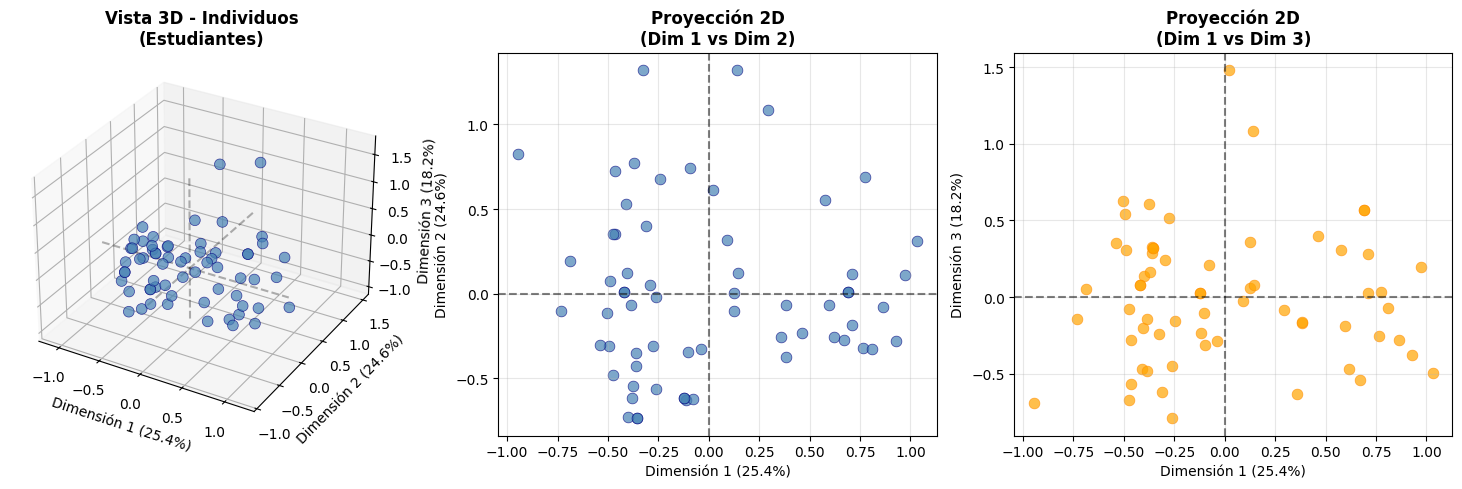


üìà INTERPRETACI√ìN VISUAL:
üîç La vista 3D muestra la distribuci√≥n de estudiantes en el espacio factorial
üìä Las proyecciones 2D permiten analizar relaciones espec√≠ficas entre dimensiones
üéØ Busca agrupaciones naturales o patrones de dispersi√≥n

üìä ESTAD√çSTICAS DE DISPERSI√ìN:
  Dimensi√≥n 1: Desv.Est = 0.502 | Rango = 1.975
  Dimensi√≥n 2: Desv.Est = 0.494 | Rango = 2.058
  Dimensi√≥n 3: Desv.Est = 0.426 | Rango = 2.274

‚úÖ Coordenadas guardadas para an√°lisis posteriores


In [28]:
# VISUALIZACI√ìN 3D DE INDIVIDUOS (ESTUDIANTES)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

print("=== VISUALIZACI√ìN 3D DE INDIVIDUOS ===")

# Obtener coordenadas de individuos en las primeras 3 dimensiones
coord_individuos = mca_result.row_coordinates(data_clean)

print(f"üìä Proyectando {coord_individuos.shape[1]} estudiantes en espacio 3D")
print(f"üéØ Dimensiones: 1 ({explained_variance[0]:.1%}), 2 ({explained_variance[1]:.1%}), 3 ({explained_variance[2]:.1%})")

# Crear figura 3D
fig = plt.figure(figsize=(15, 5))

# ===== GR√ÅFICO 1: VISTA GENERAL 3D =====
ax1 = fig.add_subplot(131, projection='3d')

scatter = ax1.scatter(coord_individuos[0], coord_individuos[1], coord_individuos[2], 
                     alpha=0.7, s=60, c='steelblue', edgecolors='navy', linewidth=0.5)

ax1.set_xlabel(f'Dimensi√≥n 1 ({explained_variance[0]:.1%})', fontsize=10)
ax1.set_ylabel(f'Dimensi√≥n 2 ({explained_variance[1]:.1%})', fontsize=10)
ax1.set_zlabel(f'Dimensi√≥n 3 ({explained_variance[2]:.1%})', fontsize=10)
ax1.set_title('Vista 3D - Individuos\n(Estudiantes)', fontsize=12, fontweight='bold')

# Agregar l√≠neas de referencia
ax1.plot([0, 0], [0, 0], [ax1.get_zlim()[0], ax1.get_zlim()[1]], 'k--', alpha=0.3)
ax1.plot([ax1.get_xlim()[0], ax1.get_xlim()[1]], [0, 0], [0, 0], 'k--', alpha=0.3)
ax1.plot([0, 0], [ax1.get_ylim()[0], ax1.get_ylim()[1]], [0, 0], 'k--', alpha=0.3)

# ===== GR√ÅFICO 2: PROYECCI√ìN DIM1 vs DIM2 =====
ax2 = fig.add_subplot(132)

ax2.scatter(coord_individuos[0], coord_individuos[1], alpha=0.7, s=60, 
           c='steelblue', edgecolors='navy', linewidth=0.5)

ax2.set_xlabel(f'Dimensi√≥n 1 ({explained_variance[0]:.1%})', fontsize=10)
ax2.set_ylabel(f'Dimensi√≥n 2 ({explained_variance[1]:.1%})', fontsize=10)
ax2.set_title('Proyecci√≥n 2D\n(Dim 1 vs Dim 2)', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.axhline(y=0, color='k', linestyle='--', alpha=0.5)
ax2.axvline(x=0, color='k', linestyle='--', alpha=0.5)

# ===== GR√ÅFICO 3: PROYECCI√ìN DIM1 vs DIM3 =====
ax3 = fig.add_subplot(133)

ax3.scatter(coord_individuos[0], coord_individuos[2], alpha=0.7, s=60, 
           c='orange', edgecolors='darkorange', linewidth=0.5)

ax3.set_xlabel(f'Dimensi√≥n 1 ({explained_variance[0]:.1%})', fontsize=10)
ax3.set_ylabel(f'Dimensi√≥n 3 ({explained_variance[2]:.1%})', fontsize=10)
ax3.set_title('Proyecci√≥n 2D\n(Dim 1 vs Dim 3)', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3)
ax3.axhline(y=0, color='k', linestyle='--', alpha=0.5)
ax3.axvline(x=0, color='k', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

print("\nüìà INTERPRETACI√ìN VISUAL:")
print("üîç La vista 3D muestra la distribuci√≥n de estudiantes en el espacio factorial")
print("üìä Las proyecciones 2D permiten analizar relaciones espec√≠ficas entre dimensiones")
print("üéØ Busca agrupaciones naturales o patrones de dispersi√≥n")

# Estad√≠sticas de dispersi√≥n
print(f"\nüìä ESTAD√çSTICAS DE DISPERSI√ìN:")
for i in range(3):
    std_dev = np.std(coord_individuos[i])
    rango = np.max(coord_individuos[i]) - np.min(coord_individuos[i])
    print(f"  Dimensi√≥n {i+1}: Desv.Est = {std_dev:.3f} | Rango = {rango:.3f}")

print(f"\n‚úÖ Coordenadas guardadas para an√°lisis posteriores")

=== BIPLOT B√ÅSICO DE CATEGOR√çAS ===
üìä Proyectando 25 categor√≠as de variables
üéØ Variables incluidas: ['SLEEP', 'CONCENTRACION', 'DESEMPENO', 'PUNTUALIDAD', 'FATIGA', 'CALIDAD_Constante', 'CALIDAD_Manejo bien', 'CALIDAD_No afecta', 'CALIDAD_Solo parciales']


C:\Users\limao\AppData\Local\Temp\ipykernel_34552\4031058733.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax1.annotate(label, (coord_categorias[0][i], coord_categorias[1][i]),
C:\Users\limao\AppData\Local\Temp\ipykernel_34552\4031058733.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2.annotate(label, (coord_categorias[0][i], coord_categorias[2][i]),


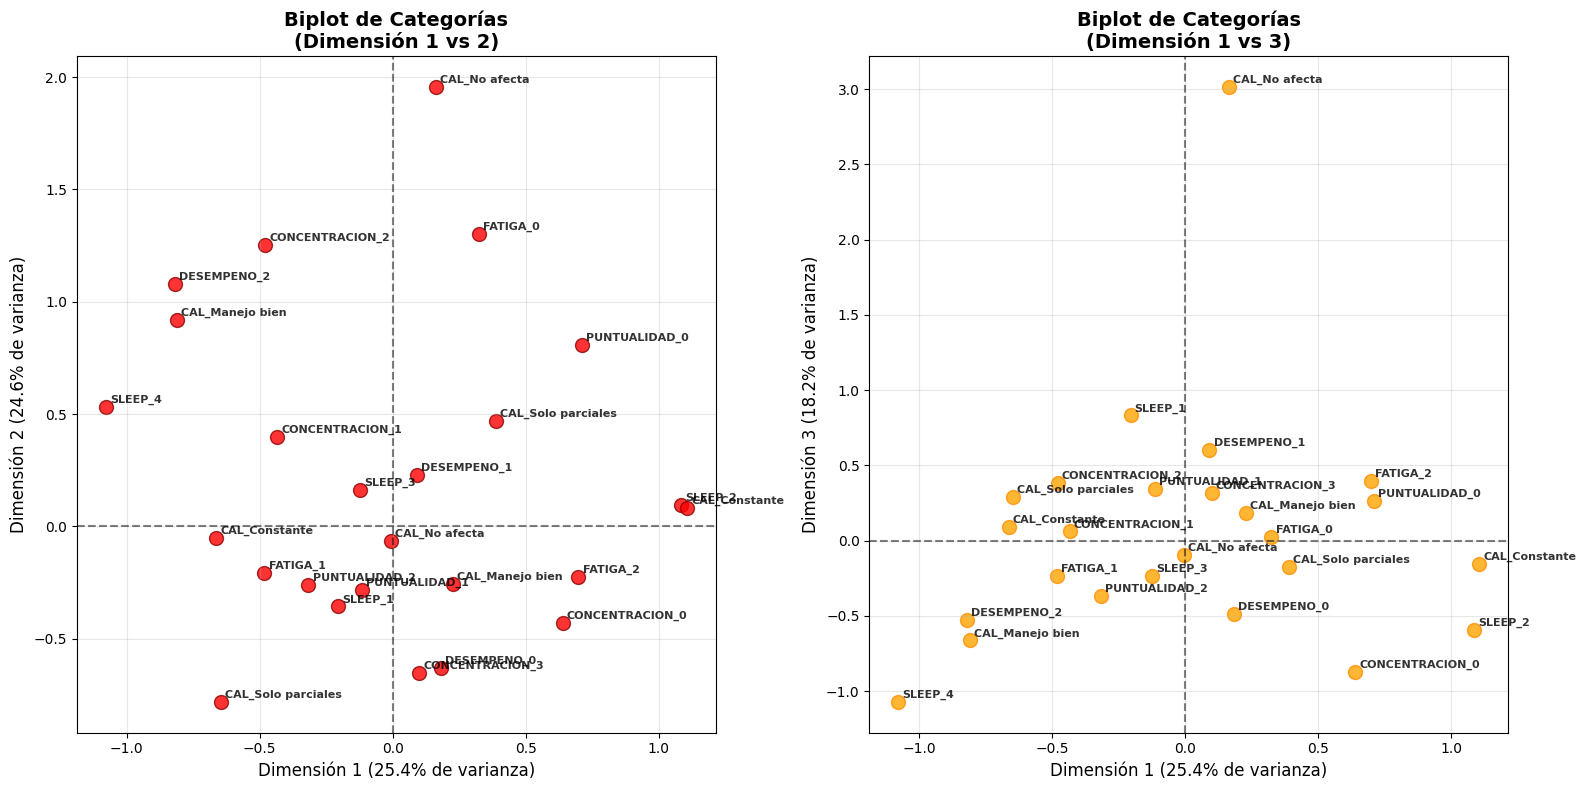


üìà INTERPRETACI√ìN DEL BIPLOT:
üîç Puntos cercanos = categor√≠as con patrones similares
üìä Distancia del origen = importancia en la dimensi√≥n
üéØ Posici√≥n relativa = asociaci√≥n entre categor√≠as

üìä AN√ÅLISIS DE POSICIONES EXTREMAS:

--- DIMENSI√ìN 1 ---
  M√°s positivas:
    CAL_Constante: 1.107
    SLEEP_2: 1.086
    PUNTUALIDAD_0: 0.711
  M√°s negativas:
    SLEEP_4: -1.079
    DESEMPENO_2: -0.820
    CAL_Manejo bien: -0.810

--- DIMENSI√ìN 2 ---
  M√°s positivas:
    CAL_No afecta: 1.958
    FATIGA_0: 1.303
    CONCENTRACION_2: 1.252
  M√°s negativas:
    CAL_Solo parciales: -0.782
    CONCENTRACION_3: -0.651
    DESEMPENO_0: -0.631

‚úÖ Biplot de categor√≠as completado


C:\Users\limao\AppData\Local\Temp\ipykernel_34552\4031058733.py:79: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for idx in reversed(indices_pos):
C:\Users\limao\AppData\Local\Temp\ipykernel_34552\4031058733.py:80: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"    {categories_names[idx]}: {coord_categorias[dim][idx]:.3f}")
C:\Users\limao\AppData\Local\Temp\ipykernel_34552\4031058733.py:86: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.i

In [29]:
# BIPLOT B√ÅSICO DE CATEGOR√çAS
import matplotlib.pyplot as plt
import seaborn as sns

print("=== BIPLOT B√ÅSICO DE CATEGOR√çAS ===")

# Obtener coordenadas de categor√≠as
coord_categorias = mca_result.column_coordinates(data_clean)

# Crear nombres de categor√≠as
categories_names = []
for col in data_clean.columns:
    for cat in data_clean[col].unique():
        if col.startswith('CALIDAD_'):
            # Para variables dummy de CALIDAD, usar nombre m√°s claro
            cat_name = col.replace('CALIDAD_', 'CAL_')
        else:
            # Para variables ordinales, mostrar variable y valor
            cat_name = f"{col}_{cat}"
        categories_names.append(cat_name)

print(f"üìä Proyectando {len(categories_names)} categor√≠as de variables")
print(f"üéØ Variables incluidas: {list(data_clean.columns)}")

# Crear figura con subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# ===== GR√ÅFICO 1: BIPLOT DIMENSI√ìN 1 vs 2 =====
scatter1 = ax1.scatter(coord_categorias[0], coord_categorias[1], 
                      alpha=0.8, s=100, c='red', edgecolors='darkred', linewidth=1)

# Agregar etiquetas a las categor√≠as
for i, label in enumerate(categories_names):
    ax1.annotate(label, (coord_categorias[0][i], coord_categorias[1][i]), 
                xytext=(3, 3), textcoords='offset points', 
                fontsize=8, alpha=0.8, fontweight='bold')

ax1.set_xlabel(f'Dimensi√≥n 1 ({explained_variance[0]:.1%} de varianza)', fontsize=12)
ax1.set_ylabel(f'Dimensi√≥n 2 ({explained_variance[1]:.1%} de varianza)', fontsize=12)
ax1.set_title('Biplot de Categor√≠as\n(Dimensi√≥n 1 vs 2)', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='k', linestyle='--', alpha=0.5)
ax1.axvline(x=0, color='k', linestyle='--', alpha=0.5)

# ===== GR√ÅFICO 2: BIPLOT DIMENSI√ìN 1 vs 3 =====
scatter2 = ax2.scatter(coord_categorias[0], coord_categorias[2], 
                      alpha=0.8, s=100, c='orange', edgecolors='darkorange', linewidth=1)

# Agregar etiquetas a las categor√≠as
for i, label in enumerate(categories_names):
    ax2.annotate(label, (coord_categorias[0][i], coord_categorias[2][i]), 
                xytext=(3, 3), textcoords='offset points', 
                fontsize=8, alpha=0.8, fontweight='bold')

ax2.set_xlabel(f'Dimensi√≥n 1 ({explained_variance[0]:.1%} de varianza)', fontsize=12)
ax2.set_ylabel(f'Dimensi√≥n 3 ({explained_variance[2]:.1%} de varianza)', fontsize=12)
ax2.set_title('Biplot de Categor√≠as\n(Dimensi√≥n 1 vs 3)', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.axhline(y=0, color='k', linestyle='--', alpha=0.5)
ax2.axvline(x=0, color='k', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

print("\nüìà INTERPRETACI√ìN DEL BIPLOT:")
print("üîç Puntos cercanos = categor√≠as con patrones similares")
print("üìä Distancia del origen = importancia en la dimensi√≥n")
print("üéØ Posici√≥n relativa = asociaci√≥n entre categor√≠as")

# An√°lisis de posiciones extremas
print(f"\nüìä AN√ÅLISIS DE POSICIONES EXTREMAS:")

for dim in range(2):
    print(f"\n--- DIMENSI√ìN {dim+1} ---")
    
    # Categor√≠as m√°s positivas
    indices_pos = np.argsort(coord_categorias[dim])[-3:]
    print(f"  M√°s positivas:")
    for idx in reversed(indices_pos):
        print(f"    {categories_names[idx]}: {coord_categorias[dim][idx]:.3f}")
    
    # Categor√≠as m√°s negativas  
    indices_neg = np.argsort(coord_categorias[dim])[:3]
    print(f"  M√°s negativas:")
    for idx in indices_neg:
        print(f"    {categories_names[idx]}: {coord_categorias[dim][idx]:.3f}")

print(f"\n‚úÖ Biplot de categor√≠as completado")

=== AN√ÅLISIS DE CONTRIBUCIONES DE CATEGOR√çAS ===
üìä Analizando contribuciones de 25 categor√≠as
üéØ A las primeras 25 dimensiones

=== AN√ÅLISIS NUM√âRICO ===

--- DIMENSI√ìN 1 (Varianza: 25.35%) ---
  Top 5 contribuyentes:
    SLEEP_3: nan (nan%)
    SLEEP_1: nan (nan%)
    SLEEP_2: nan (nan%)
    SLEEP_4: nan (nan%)
    CONCENTRACION_2: nan (nan%)
  Contribuci√≥n acumulada (Top 5): 0.0000 (0.0%)

--- DIMENSI√ìN 2 (Varianza: 24.56%) ---
  Top 5 contribuyentes:
    SLEEP_3: nan (nan%)
    SLEEP_1: nan (nan%)
    SLEEP_2: nan (nan%)
    SLEEP_4: nan (nan%)
    CONCENTRACION_2: nan (nan%)
  Contribuci√≥n acumulada (Top 5): 0.0000 (0.0%)

--- DIMENSI√ìN 3 (Varianza: 18.22%) ---
  Top 5 contribuyentes:
    SLEEP_3: nan (nan%)
    SLEEP_1: nan (nan%)
    SLEEP_2: nan (nan%)
    SLEEP_4: nan (nan%)
    CONCENTRACION_2: nan (nan%)
  Contribuci√≥n acumulada (Top 5): 0.0000 (0.0%)

=== VISUALIZACI√ìN DE CONTRIBUCIONES ===


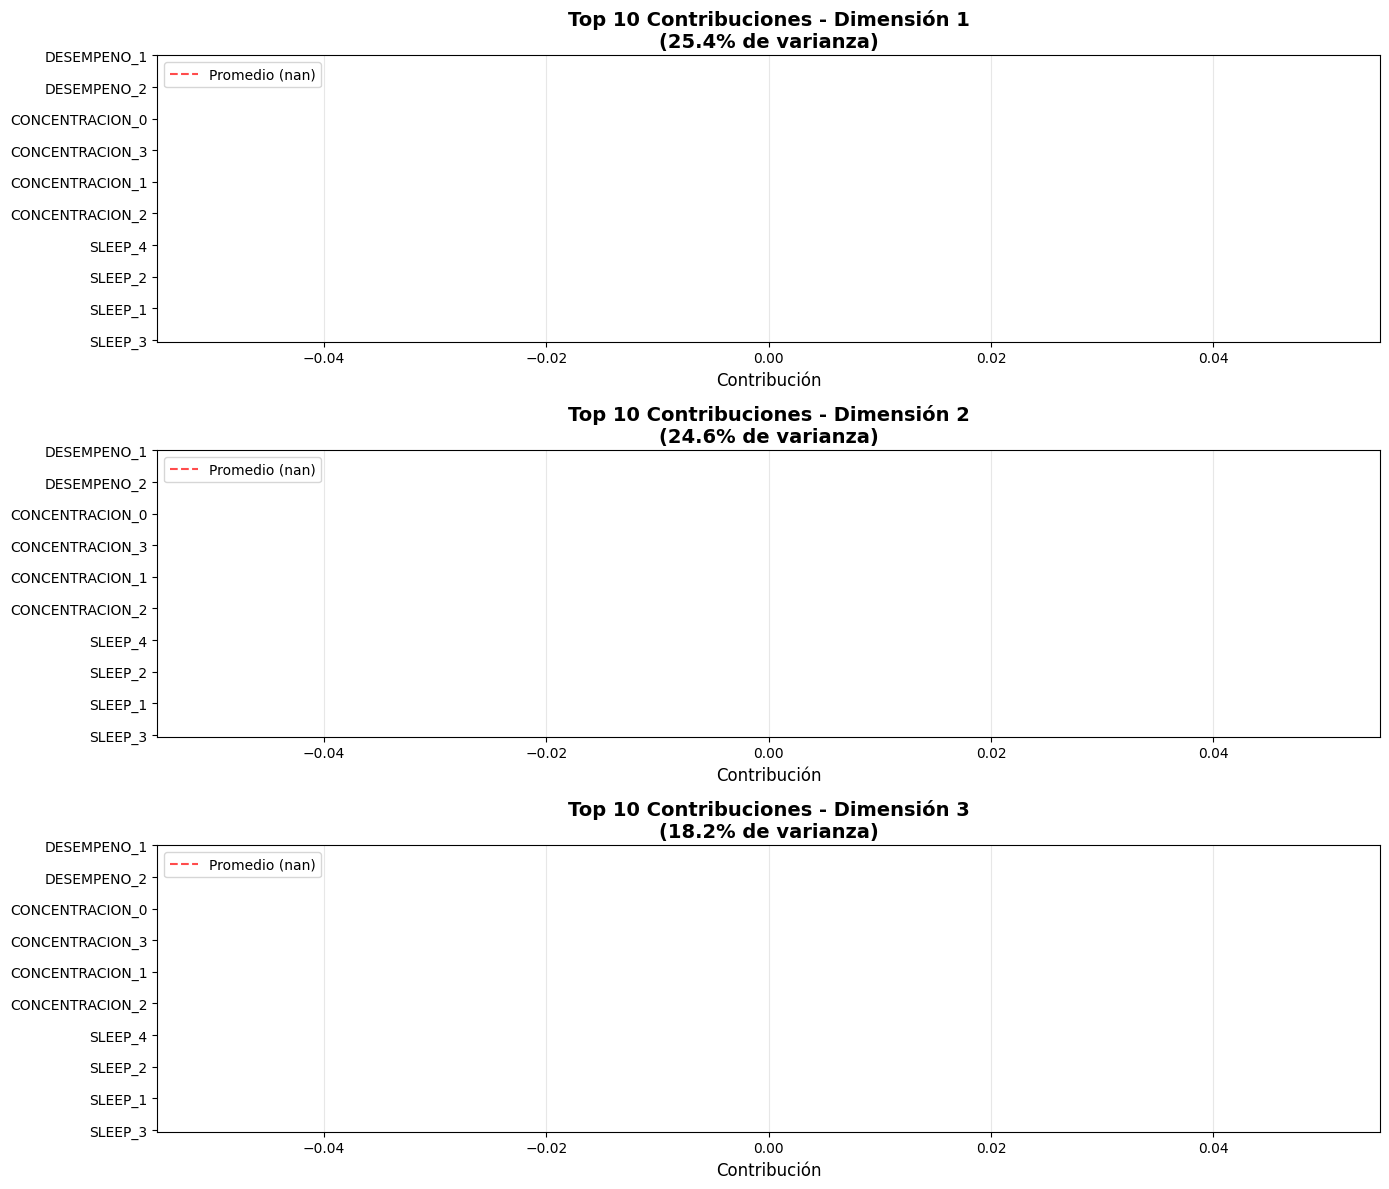


=== TABLA RESUMEN - TOP CONTRIBUYENTES ===
 Dimensi√≥n  Ranking Categor√≠a Contribuci√≥n Porcentaje
         1        1   SLEEP_3          nan       nan%
         1        2   SLEEP_1          nan       nan%
         1        3   SLEEP_2          nan       nan%
         2        1   SLEEP_3          nan       nan%
         2        2   SLEEP_1          nan       nan%
         2        3   SLEEP_2          nan       nan%
         3        1   SLEEP_3          nan       nan%
         3        2   SLEEP_1          nan       nan%
         3        3   SLEEP_2          nan       nan%

üí° INTERPRETACI√ìN:
üìà Las categor√≠as con mayor contribuci√≥n definen el significado de cada dimensi√≥n
üéØ Contribuci√≥n > promedio indica relevancia especial para esa dimensi√≥n
üìä Suma de contribuciones por dimensi√≥n = 1.000 (100%)

‚úÖ An√°lisis de contribuciones completado


In [30]:
# AN√ÅLISIS NUM√âRICO Y VISUAL DE CONTRIBUCIONES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("=== AN√ÅLISIS DE CONTRIBUCIONES DE CATEGOR√çAS ===")

# Obtener contribuciones de las categor√≠as a cada dimensi√≥n
contributions = mca_result.column_contributions_

print(f"üìä Analizando contribuciones de {len(categories_names)} categor√≠as")
print(f"üéØ A las primeras {contributions.shape[0]} dimensiones")

# Crear DataFrame para mejor manejo
contrib_df = pd.DataFrame(
    contributions.T,
    columns=[f'Dim_{i+1}' for i in range(contributions.shape[0])],
    index=categories_names
)

print(f"\n=== AN√ÅLISIS NUM√âRICO ===")

# An√°lisis por dimensi√≥n
for dim in range(min(3, contributions.shape[0])):
    dim_name = f'Dim_{dim+1}'
    print(f"\n--- DIMENSI√ìN {dim+1} (Varianza: {explained_variance[dim]:.2%}) ---")
    
    # Top 5 categor√≠as que m√°s contribuyen
    top_contrib = contrib_df[dim_name].sort_values(ascending=False).head(5)
    print(f"  Top 5 contribuyentes:")
    for cat, contrib in top_contrib.items():
        print(f"    {cat}: {contrib:.4f} ({contrib*100:.2f}%)")
    
    # Contribuci√≥n acumulada del top 5
    top5_sum = top_contrib.sum()
    print(f"  Contribuci√≥n acumulada (Top 5): {top5_sum:.4f} ({top5_sum*100:.1f}%)")

# Crear visualizaci√≥n de contribuciones
print(f"\n=== VISUALIZACI√ìN DE CONTRIBUCIONES ===")

# Configurar el n√∫mero de subplots basado en dimensiones disponibles
n_dims = min(3, contributions.shape[0])
fig, axes = plt.subplots(n_dims, 1, figsize=(14, 4*n_dims))

# Si solo hay una dimensi√≥n, asegurar que axes sea una lista
if n_dims == 1:
    axes = [axes]

for dim in range(n_dims):
    ax = axes[dim]
    dim_name = f'Dim_{dim+1}'
    
    # Top 10 contribuciones para esta dimensi√≥n
    top_contrib_viz = contrib_df[dim_name].sort_values(ascending=False).head(10)
    
    # Crear gr√°fico de barras horizontales
    colors = plt.cm.Set3(np.linspace(0, 1, len(top_contrib_viz)))
    bars = ax.barh(range(len(top_contrib_viz)), top_contrib_viz.values, color=colors)
    
    # Configurar etiquetas y t√≠tulo
    ax.set_yticks(range(len(top_contrib_viz)))
    ax.set_yticklabels(top_contrib_viz.index, fontsize=10)
    ax.set_xlabel('Contribuci√≥n', fontsize=12)
    ax.set_title(f'Top 10 Contribuciones - Dimensi√≥n {dim+1}\n({explained_variance[dim]:.1%} de varianza)', 
                fontsize=14, fontweight='bold')
    
    # Agregar valores en las barras
    for i, (bar, value) in enumerate(zip(bars, top_contrib_viz.values)):
        ax.text(value + 0.001, i, f'{value:.3f}', 
               va='center', ha='left', fontsize=9, fontweight='bold')
    
    # A√±adir l√≠nea de referencia (contribuci√≥n promedio)
    avg_contrib = contrib_df[dim_name].mean()
    ax.axvline(avg_contrib, color='red', linestyle='--', alpha=0.7, 
              label=f'Promedio ({avg_contrib:.3f})')
    ax.legend()
    
    ax.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

# Tabla resumen de contribuciones principales
print(f"\n=== TABLA RESUMEN - TOP CONTRIBUYENTES ===")

# Crear tabla resumen con top 3 por dimensi√≥n
summary_data = []
for dim in range(min(3, contributions.shape[0])):
    dim_name = f'Dim_{dim+1}'
    top3 = contrib_df[dim_name].sort_values(ascending=False).head(3)
    
    for rank, (cat, contrib) in enumerate(top3.items(), 1):
        summary_data.append({
            'Dimensi√≥n': dim+1,
            'Ranking': rank,
            'Categor√≠a': cat,
            'Contribuci√≥n': f'{contrib:.4f}',
            'Porcentaje': f'{contrib*100:.2f}%'
        })

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

print(f"\nüí° INTERPRETACI√ìN:")
print(f"üìà Las categor√≠as con mayor contribuci√≥n definen el significado de cada dimensi√≥n")
print(f"üéØ Contribuci√≥n > promedio indica relevancia especial para esa dimensi√≥n")
print(f"üìä Suma de contribuciones por dimensi√≥n = 1.000 (100%)")

print(f"\n‚úÖ An√°lisis de contribuciones completado")

=== AN√ÅLISIS DE VARIABLES SUPLEMENTARIAS ===
üìä Variables suplementarias: ['GENERO', 'CARRERA', 'SEMESTRE', 'BECA']
üéØ Individuos analizados: 64

=== CATEGOR√çAS POR VARIABLE SUPLEMENTARIA ===
  GENERO: 2 categor√≠as ‚Üí ['Femenino', 'Masculino']
  CARRERA: 21 categor√≠as ‚Üí ['Administration de negocios internacionales', 'Administraci√≥n de mercadeo y log√≠stica internacionales', 'Ingenier√≠a Qu√≠mica', 'Ingenier√≠a Industrial', 'Ingenier√≠a Mec√°nica', 'Economia y finanzas internacionales', 'Medicina', 'Ingenieria de Bioproducci√≥n', 'Derecho', 'Ingenieria Civil', 'Ciencias politicas', 'Comunicaci√≥n social y periodismo', 'Comunicaci√≥n corporativa', 'Ingenieria inform√°tica', 'Administraci√≥n de empresas', 'Administraci√≥n y servicio', 'Comunicaci√≥n audiovisual y multimedios', 'Gastronomia', 'Filosofia', 'Ciencia de Datos', 'Comportamiento organizacional']
  SEMESTRE: 8 categor√≠as ‚Üí [np.int64(2), np.int64(4), np.int64(5), np.int64(3), np.int64(8), np.int64(6), np.int64(7), 

C:\Users\limao\AppData\Local\Temp\ipykernel_34552\3368981541.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap(color_palettes[idx])(np.linspace(0, 1, len(categories)))



--- Procesando SEMESTRE ---
  2: n=10, Centroide=(0.265, -0.088)
  4: n=9, Centroide=(-0.020, -0.016)
  5: n=13, Centroide=(-0.101, 0.182)
  3: n=10, Centroide=(0.231, 0.153)
  8: n=4, Centroide=(-0.033, 0.045)
  6: n=9, Centroide=(-0.064, -0.283)
  7: n=4, Centroide=(-0.375, 0.072)
  1: n=5, Centroide=(-0.252, -0.159)

--- Procesando BECA ---
  No: n=25, Centroide=(0.004, 0.057)
  Si: n=39, Centroide=(-0.002, -0.036)


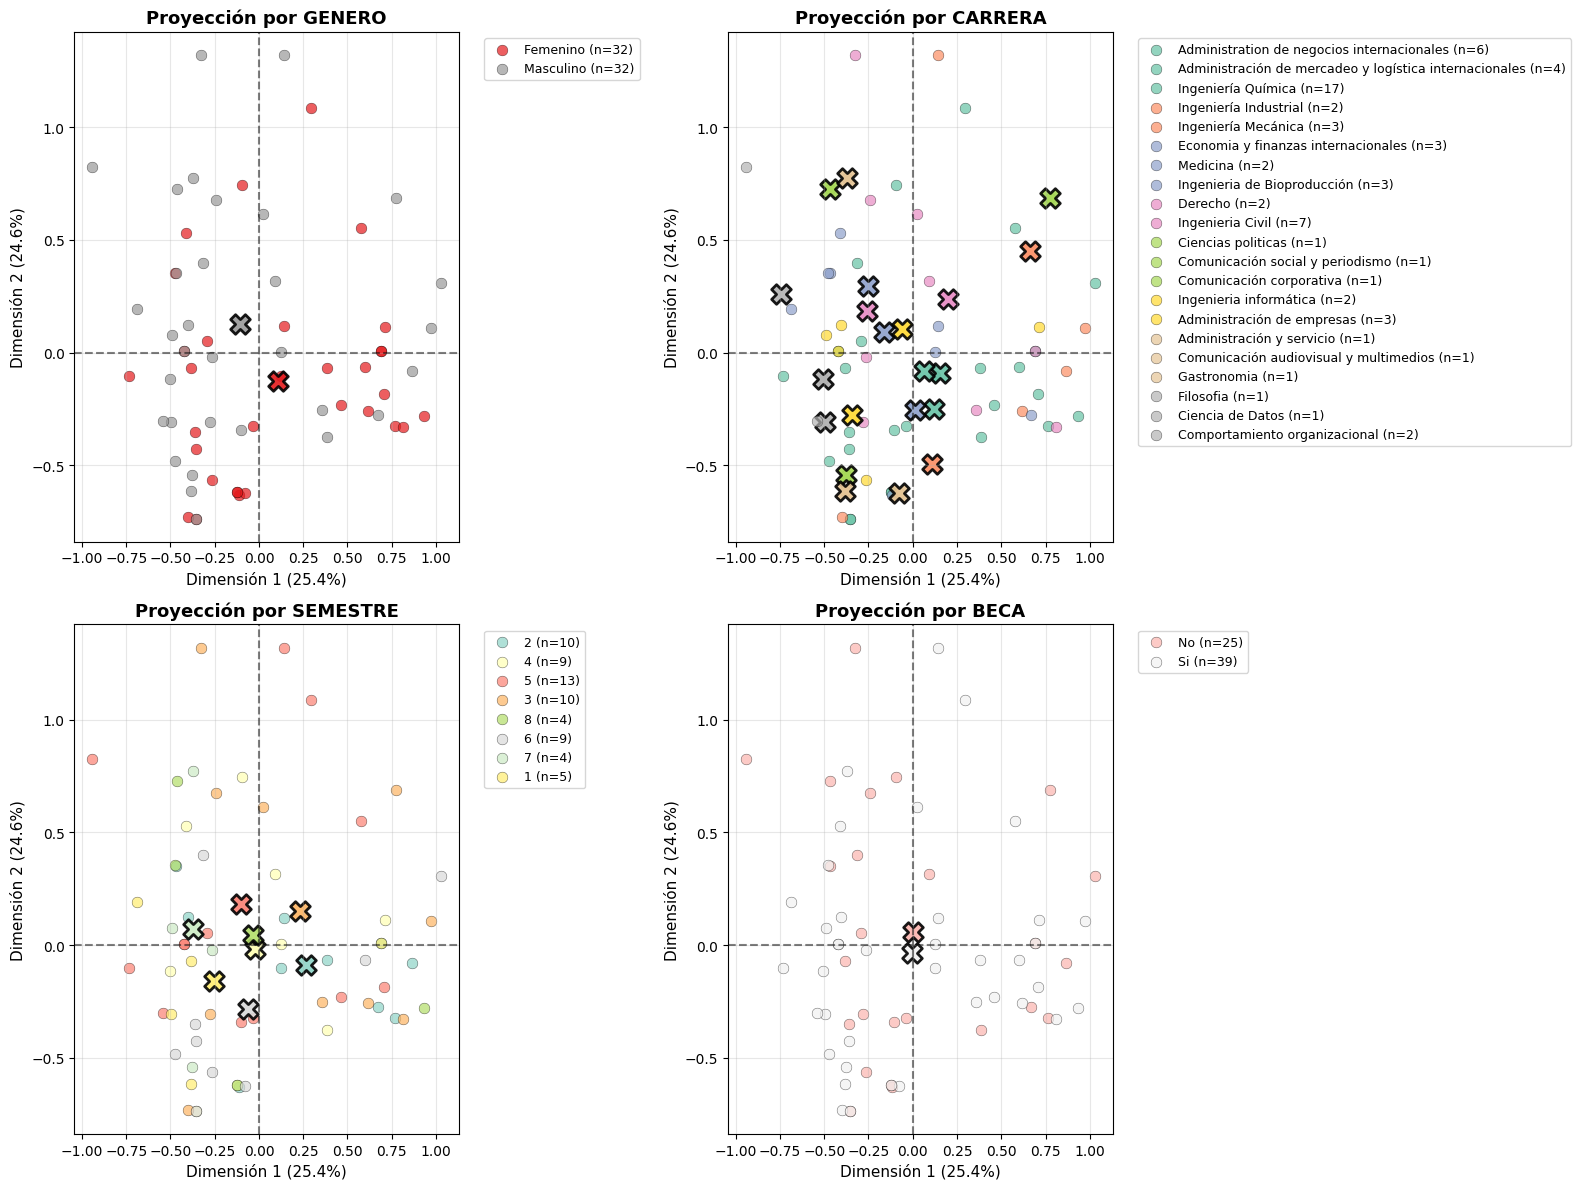


=== AN√ÅLISIS ESTAD√çSTICO DE CENTROIDES ===

--- CENTROIDES PARA GENERO ---
  Femenino:
    N = 32
    Dim1 = 0.109
    Dim2 = -0.127
    Dim3 = -0.004
    Distancia al origen = 0.167
  Masculino:
    N = 32
    Dim1 = -0.109
    Dim2 = 0.127
    Dim3 = 0.004
    Distancia al origen = 0.167

--- CENTROIDES PARA CARRERA ---
  Administration de negocios internacionales:
    N = 6
    Dim1 = 0.122
    Dim2 = -0.252
    Dim3 = -0.184
    Distancia al origen = 0.280
  Administraci√≥n de mercadeo y log√≠stica internacionales:
    N = 4
    Dim1 = 0.155
    Dim2 = -0.090
    Dim3 = 0.101
    Distancia al origen = 0.179
  Ingenier√≠a Qu√≠mica:
    N = 17
    Dim1 = 0.063
    Dim2 = -0.083
    Dim3 = -0.024
    Distancia al origen = 0.104
  Ingenier√≠a Industrial:
    N = 2
    Dim1 = 0.109
    Dim2 = -0.495
    Dim3 = -0.166
    Distancia al origen = 0.507
  Ingenier√≠a Mec√°nica:
    N = 3
    Dim1 = 0.660
    Dim2 = 0.449
    Dim3 = 0.333
    Distancia al origen = 0.799
  Economia y finanz

In [31]:
# AN√ÅLISIS DE VARIABLES SUPLEMENTARIAS
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

print("=== AN√ÅLISIS DE VARIABLES SUPLEMENTARIAS ===")

# Obtener datos de variables suplementarias (sin valores faltantes)
data_suplementarias = df.loc[data_clean.index, VARIABLES_SUPLEMENTARIAS].copy()

print(f"üìä Variables suplementarias: {VARIABLES_SUPLEMENTARIAS}")
print(f"üéØ Individuos analizados: {len(data_suplementarias)}")

# Verificar y mostrar categor√≠as de cada variable suplementaria
print(f"\n=== CATEGOR√çAS POR VARIABLE SUPLEMENTARIA ===")
for var in VARIABLES_SUPLEMENTARIAS:
    unique_vals = data_suplementarias[var].unique()
    print(f"  {var}: {len(unique_vals)} categor√≠as ‚Üí {list(unique_vals)}")

# Crear visualizaci√≥n con proyecci√≥n de variables suplementarias
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

# Paleta de colores para cada variable
color_palettes = ['Set1', 'Set2', 'Set3', 'Pastel1']

for idx, var_sup in enumerate(VARIABLES_SUPLEMENTARIAS):
    ax = axes[idx]
    
    # Obtener categor√≠as √∫nicas de la variable suplementaria
    categories = data_suplementarias[var_sup].unique()
    
    # Asignar colores
    colors = plt.cm.get_cmap(color_palettes[idx])(np.linspace(0, 1, len(categories)))
    
    print(f"\n--- Procesando {var_sup} ---")
    
    # Plotear individuos coloreados por la variable suplementaria
    for i, cat in enumerate(categories):
        mask = data_suplementarias[var_sup] == cat
        n_obs = mask.sum()
        
        if n_obs > 0:  # Solo si hay observaciones
            ax.scatter(coord_individuos[0][mask], coord_individuos[1][mask], 
                      label=f'{cat} (n={n_obs})', alpha=0.7, s=60, 
                      color=colors[i], edgecolors='black', linewidth=0.3)
            
            # Calcular y mostrar centroide
            centroid_x = coord_individuos[0][mask].mean()
            centroid_y = coord_individuos[1][mask].mean()
            
            # Marcar centroide
            ax.scatter(centroid_x, centroid_y, marker='X', s=200, 
                      color=colors[i], edgecolors='black', linewidth=2,
                      alpha=0.9)
            
            print(f"  {cat}: n={n_obs}, Centroide=({centroid_x:.3f}, {centroid_y:.3f})")
    
    ax.set_xlabel(f'Dimensi√≥n 1 ({explained_variance[0]:.1%})', fontsize=11)
    ax.set_ylabel(f'Dimensi√≥n 2 ({explained_variance[1]:.1%})', fontsize=11)
    ax.set_title(f'Proyecci√≥n por {var_sup}', fontsize=13, fontweight='bold')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
    ax.grid(True, alpha=0.3)
    ax.axhline(y=0, color='k', linestyle='--', alpha=0.5)
    ax.axvline(x=0, color='k', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# An√°lisis estad√≠stico de centroides
print(f"\n=== AN√ÅLISIS ESTAD√çSTICO DE CENTROIDES ===")

centroids_data = []
for var_sup in VARIABLES_SUPLEMENTARIAS:
    print(f"\n--- CENTROIDES PARA {var_sup} ---")
    
    categories = data_suplementarias[var_sup].unique()
    
    for cat in categories:
        mask = data_suplementarias[var_sup] == cat
        if mask.sum() > 0:
            centroid_dim1 = coord_individuos[0][mask].mean()
            centroid_dim2 = coord_individuos[1][mask].mean()
            centroid_dim3 = coord_individuos[2][mask].mean()
            n_obs = mask.sum()
            
            centroids_data.append({
                'Variable': var_sup,
                'Categor√≠a': cat,
                'N': n_obs,
                'Dim1': centroid_dim1,
                'Dim2': centroid_dim2,
                'Dim3': centroid_dim3,
                'Distancia_Origen': np.sqrt(centroid_dim1**2 + centroid_dim2**2)
            })
            
            print(f"  {cat}:")
            print(f"    N = {n_obs}")
            print(f"    Dim1 = {centroid_dim1:.3f}")
            print(f"    Dim2 = {centroid_dim2:.3f}")
            print(f"    Dim3 = {centroid_dim3:.3f}")
            print(f"    Distancia al origen = {np.sqrt(centroid_dim1**2 + centroid_dim2**2):.3f}")

# Crear DataFrame de centroides para an√°lisis
centroids_df = pd.DataFrame(centroids_data)

print(f"\n=== TABLA RESUMEN DE CENTROIDES ===")
print(centroids_df.round(3).to_string(index=False))

# Identificar categor√≠as m√°s extremas
print(f"\n=== CATEGOR√çAS M√ÅS EXTREMAS ===")

# Por dimensi√≥n 1
dim1_max = centroids_df.loc[centroids_df['Dim1'].idxmax()]
dim1_min = centroids_df.loc[centroids_df['Dim1'].idxmin()]
print(f"  Dimensi√≥n 1:")
print(f"    M√°s positiva: {dim1_max['Variable']} - {dim1_max['Categor√≠a']} ({dim1_max['Dim1']:.3f})")
print(f"    M√°s negativa: {dim1_min['Variable']} - {dim1_min['Categor√≠a']} ({dim1_min['Dim1']:.3f})")

# Por dimensi√≥n 2
dim2_max = centroids_df.loc[centroids_df['Dim2'].idxmax()]
dim2_min = centroids_df.loc[centroids_df['Dim2'].idxmin()]
print(f"  Dimensi√≥n 2:")
print(f"    M√°s positiva: {dim2_max['Variable']} - {dim2_max['Categor√≠a']} ({dim2_max['Dim2']:.3f})")
print(f"    M√°s negativa: {dim2_min['Variable']} - {dim2_min['Categor√≠a']} ({dim2_min['Dim2']:.3f})")

# Distancia m√°xima al origen
dist_max = centroids_df.loc[centroids_df['Distancia_Origen'].idxmax()]
print(f"  Mayor distancia al origen: {dist_max['Variable']} - {dist_max['Categor√≠a']} ({dist_max['Distancia_Origen']:.3f})")

print(f"\nüí° INTERPRETACI√ìN:")
print(f"üìà Las X marcan los centroides (puntos promedio) de cada grupo")
print(f"üéØ Grupos m√°s alejados del origen tienen caracter√≠sticas m√°s distintivas")
print(f"üìä La proximidad entre centroides indica similitud entre grupos")

print(f"\n‚úÖ An√°lisis de variables suplementarias completado")

# 4. Conclusiones del An√°lisis de Correspondencia M√∫ltiple

## 4.1 Hallazgos Principales

El an√°lisis nos permiti√≥ ver que los h√°bitos de sue√±o, concentraci√≥n, puntualidad, fatiga y la percepci√≥n de la calidad acad√©mica s√≠ marcan diferencias claras entre estudiantes.

- Las dos primeras dimensiones explican el **49.91% de la variabilidad total** (Dimensi√≥n 1 = **25.35%**, Dimensi√≥n 2 = **24.56%**).  
- Con cuatro dimensiones se logra explicar el **85.42% de la variabilidad acumulada** (Dimensi√≥n 3 = **18.22%**, Dimensi√≥n 4 = **17.29%**).  
- La **primera dimensi√≥n (25.35%)** refleja un eje de **bienestar acad√©mico**: a un lado se ubican quienes duermen bien, se concentran m√°s y rinden mejor, y al otro quienes tienen problemas de sue√±o, menos concentraci√≥n y menor desempe√±o.  
- La **segunda dimensi√≥n (24.56%)** refleja un eje de **manejo del estr√©s y la regularidad**: diferencia a los estudiantes con rutinas m√°s organizadas y menos fatiga de aquellos con mayor cansancio y desorden en sus horarios.  


## 4.2 Perfiles Estudiantiles Identificados

A partir de esto se reconocen tres perfiles principales:

- **Perfil 1 ‚Äì Estudiantes de Alto Rendimiento**  
  Suelen dormir bien, tienen buena concentraci√≥n, mejor desempe√±o y menos fatiga. Tambi√©n suelen ser m√°s puntuales.  

- **Perfil 2 ‚Äì Estudiantes en Riesgo**  
  Presentan sue√±o irregular, menor concentraci√≥n, m√°s fatiga y problemas de puntualidad. Son quienes m√°s pueden verse afectados en √©pocas de parciales.  

- **Perfil 3 ‚Äì Estudiantes Adaptativos (intermedios)**  
  Aunque pueden tener sue√±o irregular, logran compensar con otras estrategias y mantener un rendimiento aceptable, aunque con mayor esfuerzo.  

## 4.3 Factores Diferenciadores

- **G√©nero:** La diferencia es muy leve, pero las mujeres tienden a ubicarse un poco m√°s hacia el lado de mejores h√°bitos de estudio y sue√±o, mientras los hombres hacia el lado opuesto.  
- **Carrera:** Algunas carreras se diferencian m√°s que otras. Por ejemplo, Ingenier√≠a Mec√°nica y Ciencias Pol√≠ticas se alejan bastante del promedio, mostrando patrones de h√°bitos m√°s extremos, mientras carreras como Ingenier√≠a Qu√≠mica o Administraci√≥n de Empresas se parecen m√°s al promedio.  
- **Semestre:** Los estudiantes de **segundo y tercer semestre** tienden a tener h√°bitos m√°s saludables, mientras que en semestres m√°s altos (sexto y s√©ptimo) se observa m√°s fatiga e irregularidad, probablemente por la carga acad√©mica.

## 4.4 Implicaciones Pr√°cticas

- Para la universidad: ser√≠a √∫til ofrecer **programas de bienestar** enfocados en higiene del sue√±o, manejo de la fatiga y t√©cnicas de concentraci√≥n, sobre todo en los semestres avanzados.  
- Para los estudiantes: es clave el **autoconocimiento**. Identificar si uno est√° en un perfil de riesgo permite ajustar h√°bitos de sue√±o, puntualidad y concentraci√≥n antes de que impacte negativamente en el rendimiento.  

## 4.5 Limitaciones

- La muestra fue de **64 estudiantes**, lo que limita la generalizaci√≥n de los resultados.  
- En varias carreras hab√≠a muy pocos estudiantes, incluso solo **1 estudiante en Ciencias Pol√≠ticas, Comunicaci√≥n Social y Periodismo, Comunicaci√≥n Audiovisual y Multimedios, Gastronom√≠a, Filosof√≠a y Ciencia de Datos**. Esto hace que los centroides de esas carreras se alejen mucho del promedio, pero no se puedan tomar como patrones representativos.  
- Es un estudio **transversal**, es decir, mide un solo momento y no muestra c√≥mo evolucionan los h√°bitos a lo largo del semestre.  
- Adem√°s, las variables fueron **autodeclaradas**, lo que puede introducir sesgo en las respuestas (p. ej., alguien puede sobrestimar su concentraci√≥n o desempe√±o).  


## 4.6 Recomendaciones para Futuras Investigaciones

- Ampliar la muestra y equilibrarla entre carreras y semestres.  
- Hacer un **seguimiento a lo largo del tiempo** para ver c√≥mo cambian los perfiles.  
- Incluir nuevas variables como estr√©s percibido, uso de pantallas por la noche, actividad f√≠sica y apoyo social.  
- Comparar estos perfiles con indicadores objetivos, como asistencia real o calificaciones, para validar los hallazgos.

---

**En resumen**, el MCA permiti√≥ identificar de forma clara distintos perfiles de estudiantes a partir de variables como el sue√±o, la concentraci√≥n, el desempe√±o, la puntualidad y la fatiga.  
El modelo mostr√≥ que con cuatro dimensiones se logra explicar m√°s del **85% de la variabilidad de los datos**, lo que da confianza en los patrones encontrados.  

Los resultados evidencian que existen estudiantes con h√°bitos regulares y buen rendimiento, otros en riesgo por fatiga y desorganizaci√≥n, y un grupo intermedio que compensa con esfuerzo.  

